## Importing Libraries

In [ ]:
import os,cv2
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

## Understanding

#### Get all folders

In [3]:
Images= os.listdir('10000')
Images

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

#### How to work with image?

In [5]:
path = fr'10000/0/0_1.jpg'
img=cv2.imread(path)
print(img)

[[[138 162 162]
  [146 170 170]
  [148 172 172]
  ...
  [150 166 172]
  [140 157 160]
  [146 163 166]]

 [[141 165 165]
  [142 166 166]
  [140 164 164]
  ...
  [147 163 169]
  [139 156 159]
  [145 162 165]]

 [[155 179 179]
  [147 171 171]
  [141 165 165]
  ...
  [150 166 172]
  [146 163 166]
  [143 162 165]]

 ...

 [[139 162 164]
  [137 160 162]
  [140 163 165]
  ...
  [136 153 156]
  [155 172 175]
  [147 166 169]]

 [[141 164 166]
  [138 161 163]
  [139 162 164]
  ...
  [147 164 167]
  [145 162 165]
  [146 165 168]]

 [[144 167 169]
  [139 162 164]
  [137 160 162]
  ...
  [144 161 164]
  [136 153 156]
  [146 165 168]]]


In [8]:
img.shape

(29, 33, 3)

##### Image 

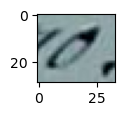

In [10]:
plt.figure(figsize=(1,1))
plt.imshow(img)
plt.show()

##### Image without resize, but at gray scale

(29, 33)


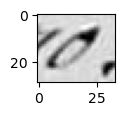

In [12]:
img2=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
print(img2.shape)
plt.figure(figsize=(1,1))
plt.imshow(img2, cmap='gray')
plt.show()

##### Image after resize

(28, 28, 3)


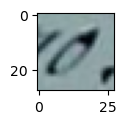

In [16]:
img3 = cv2.resize(img, (28,28))
print(img3.shape)

## image after resize
plt.figure(figsize=(1,1))
plt.imshow(img3)
plt.show()

##### Image with resize & At gray scale

(28, 28)


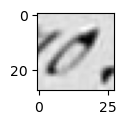

In [18]:
img2=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
img4=cv2.resize(img2, (28,28))
print(img4.shape) # ==> (28,28)
plt.figure(figsize=(1,1))
plt.imshow(img4, cmap='gray')
plt.show()

## Preprocessing
#### Final steps
1. ##### Read Image
2. ##### Convert to **Gray** scale
3. ##### Resize Image to 28*28
4. ##### Reshape to be 1 vector **784**
5. 

##### Reading All Images

In [22]:
All_images = []
All_labels = []

for j in Images:
    Imag = os.listdir(fr'10000/{j}')

    for i in Imag:
        img= cv2.imread(os.path.join(fr'10000/{j}',i))
        img= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        img= cv2.resize(img, (28,28))
        
        All_images.append(img)
        All_labels.append(int(j))

All_images = np.array(All_images) 
All_labels = np.array(All_labels)

##### Cheak all labels

In [24]:
df = pd.DataFrame(All_labels)
df.value_counts()

0
0    1000
1    1000
2    1000
3    1000
4    1000
5    1000
6    1000
7    1000
8    1000
9    1000
Name: count, dtype: int64

In [26]:
All_images 

array([[[160, 167, 166, ..., 165, 159, 161],
        [163, 162, 160, ..., 162, 157, 160],
        [175, 166, 162, ..., 164, 163, 161],
        ...,
        [160, 159, 164, ..., 130, 164, 165],
        [162, 159, 162, ..., 157, 162, 164],
        [164, 159, 159, ..., 162, 154, 163]],

       [[139, 117,  64, ..., 176, 179, 178],
        [144, 109,  59, ..., 175, 174, 177],
        [141,  91,  50, ..., 175, 174, 176],
        ...,
        [171, 169, 166, ..., 170, 166, 172],
        [171, 172, 172, ..., 171, 167, 172],
        [167, 172, 174, ..., 172, 169, 172]],

       [[175, 173, 172, ..., 172, 168, 168],
        [175, 174, 173, ..., 172, 170, 171],
        [175, 174, 173, ..., 171, 170, 170],
        ...,
        [171, 177, 173, ..., 164, 165, 170],
        [166, 163, 141, ..., 147, 155, 165],
        [172, 160, 128, ..., 124, 147, 157]],

       ...,

       [[179, 174, 175, ..., 181, 164, 114],
        [181, 177, 177, ..., 178, 137,  79],
        [179, 175, 176, ..., 117,  61,  43

In [28]:
All_images.shape

(10000, 28, 28)

In [30]:
rand=[99,1111,2005,3445,4905,5001,6080,7900,8095,9085]

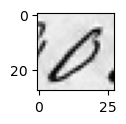

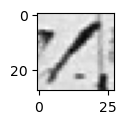

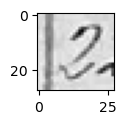

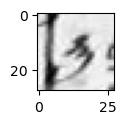

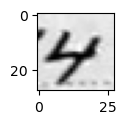

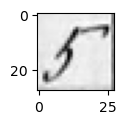

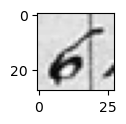

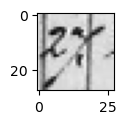

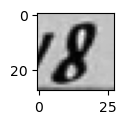

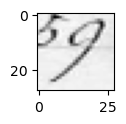

In [32]:
for i in rand:
    plt.figure(figsize=(1,1))
    plt.imshow(All_images[i], cmap='gray')
    plt.show()

##### Change Image fron 2d matrix to One Vector

In [36]:
All_images = All_images.reshape(10000,-1)
All_images.shape

(10000, 784)

In [38]:
All_images

array([[160, 167, 166, ..., 162, 154, 163],
       [139, 117,  64, ..., 172, 169, 172],
       [175, 173, 172, ..., 124, 147, 157],
       ...,
       [179, 174, 175, ..., 173, 187, 130],
       [172, 172, 174, ..., 158, 166, 179],
       [192, 173, 177, ...,  60,  70,  61]], dtype=uint8)

##### Scalling

In [40]:
All_images = All_images / 255.0 
All_images

array([[0.62745098, 0.65490196, 0.65098039, ..., 0.63529412, 0.60392157,
        0.63921569],
       [0.54509804, 0.45882353, 0.25098039, ..., 0.6745098 , 0.6627451 ,
        0.6745098 ],
       [0.68627451, 0.67843137, 0.6745098 , ..., 0.48627451, 0.57647059,
        0.61568627],
       ...,
       [0.70196078, 0.68235294, 0.68627451, ..., 0.67843137, 0.73333333,
        0.50980392],
       [0.6745098 , 0.6745098 , 0.68235294, ..., 0.61960784, 0.65098039,
        0.70196078],
       [0.75294118, 0.67843137, 0.69411765, ..., 0.23529412, 0.2745098 ,
        0.23921569]])

##### splitting data

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(All_images, All_labels, test_size=0.2, random_state=88)

print('X_train shape: ' , X_train.shape)
print('X_test shape: ' , X_test.shape)
print('y_train shape: ' , y_train.shape)
print('y_test shape: ' , y_test.shape)

X_train shape:  (8000, 784)
X_test shape:  (2000, 784)
y_train shape:  (8000,)
y_test shape:  (2000,)


___
$$****************************************$$
$$****************************************$$
___

## Building Models

In [44]:
import time

from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import  SGDRegressor
from sklearn.naive_bayes import GaussianNB, MultinomialNB

from sklearn.model_selection import cross_validate, GridSearchCV
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, classification_report, f1_score
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

from sklearn.multiclass import OneVsRestClassifier

### MLP
___
##### Hyperparameters to tune:
1. ###### Number of neurons per layer
2. ###### Learning rate
3. ###### Number of epochs
4. ###### Batch size

In [59]:
mlp = MLPClassifier(
                    activation='logistic',
                    verbose=True,
                  )

##### GridSearchCV to tune

In [40]:

mlp_param = {
    'hidden_layer_sizes': [(512,256, 128), (256, 128, 64), (512, 128, 64)],  
    'learning_rate' :['constant', 'invscaling'],
    'learning_rate_init': [0.001, 0.01],         
    'max_iter': [ 100, 200],                          
    'batch_size': [256, 512],     
}
mlp_grid = GridSearchCV(
    mlp,
    mlp_param,
    scoring='accuracy',  
    cv=5,                          
    verbose=1,       
)
mlp_grid.fit(X_train, y_train)

Fitting 3 folds for each of 48 candidates, totalling 144 fits
Iteration 1, loss = 2.31688480
Iteration 2, loss = 2.30301151
Iteration 3, loss = 2.27197864
Iteration 4, loss = 2.13091197
Iteration 5, loss = 1.91915009
Iteration 6, loss = 1.76941963
Iteration 7, loss = 1.67289896
Iteration 8, loss = 1.61164031
Iteration 9, loss = 1.55607767
Iteration 10, loss = 1.48238442
Iteration 11, loss = 1.39765498
Iteration 12, loss = 1.33788939
Iteration 13, loss = 1.28387912
Iteration 14, loss = 1.24038608
Iteration 15, loss = 1.19509104
Iteration 16, loss = 1.16517581
Iteration 17, loss = 1.12086274
Iteration 18, loss = 1.09140132
Iteration 19, loss = 1.16503606
Iteration 20, loss = 1.07881264
Iteration 21, loss = 1.01714164
Iteration 22, loss = 1.01980211
Iteration 23, loss = 1.00582797
Iteration 24, loss = 0.96112045
Iteration 25, loss = 0.93785291
Iteration 26, loss = 0.92481341
Iteration 27, loss = 0.91538608
Iteration 28, loss = 0.90664870
Iteration 29, loss = 0.88847953
Iteration 30, loss 

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.31694787
Iteration 2, loss = 2.30304123
Iteration 3, loss = 2.27485442
Iteration 4, loss = 2.13744709
Iteration 5, loss = 1.91041798
Iteration 6, loss = 1.72754812
Iteration 7, loss = 1.64742300
Iteration 8, loss = 1.58376023
Iteration 9, loss = 1.53502593
Iteration 10, loss = 1.46093417
Iteration 11, loss = 1.38845153
Iteration 12, loss = 1.36177815
Iteration 13, loss = 1.30591858
Iteration 14, loss = 1.27931359
Iteration 15, loss = 1.25604513
Iteration 16, loss = 1.23952487
Iteration 17, loss = 1.18389018
Iteration 18, loss = 1.17697515
Iteration 19, loss = 1.16770642
Iteration 20, loss = 1.08645304
Iteration 21, loss = 1.06075418
Iteration 22, loss = 1.05889791
Iteration 23, loss = 1.05844644
Iteration 24, loss = 1.00485427
Iteration 25, loss = 0.96829935
Iteration 26, loss = 0.95794959
Iteration 27, loss = 0.93935971
Iteration 28, loss = 0.92297167
Iteration 29, loss = 0.91695420
Iteration 30, loss = 0.89397963
Iteration 31, loss = 0.87643443
Iteration 32, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.31506614
Iteration 2, loss = 2.29876215
Iteration 3, loss = 2.25695625
Iteration 4, loss = 2.09386171
Iteration 5, loss = 1.90853778
Iteration 6, loss = 1.75262931
Iteration 7, loss = 1.65173455
Iteration 8, loss = 1.57357054
Iteration 9, loss = 1.50565627
Iteration 10, loss = 1.42420783
Iteration 11, loss = 1.37795060
Iteration 12, loss = 1.30912335
Iteration 13, loss = 1.30100754
Iteration 14, loss = 1.23555811
Iteration 15, loss = 1.20465870
Iteration 16, loss = 1.16525393
Iteration 17, loss = 1.13013818
Iteration 18, loss = 1.12232067
Iteration 19, loss = 1.08598896
Iteration 20, loss = 1.03642719
Iteration 21, loss = 1.03904007
Iteration 22, loss = 1.08082788
Iteration 23, loss = 0.98742198
Iteration 24, loss = 0.96587516
Iteration 25, loss = 0.95414841
Iteration 26, loss = 0.94170123
Iteration 27, loss = 0.91465529
Iteration 28, loss = 0.89647128
Iteration 29, loss = 0.88963831
Iteration 30, loss = 0.91014425
Iteration 31, loss = 0.86900108
Iteration 32, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.31688480
Iteration 2, loss = 2.30301151
Iteration 3, loss = 2.27197864
Iteration 4, loss = 2.13091197
Iteration 5, loss = 1.91915009
Iteration 6, loss = 1.76941963
Iteration 7, loss = 1.67289896
Iteration 8, loss = 1.61164031
Iteration 9, loss = 1.55607767
Iteration 10, loss = 1.48238442
Iteration 11, loss = 1.39765498
Iteration 12, loss = 1.33788939
Iteration 13, loss = 1.28387912
Iteration 14, loss = 1.24038608
Iteration 15, loss = 1.19509104
Iteration 16, loss = 1.16517581
Iteration 17, loss = 1.12086274
Iteration 18, loss = 1.09140132
Iteration 19, loss = 1.16503606
Iteration 20, loss = 1.07881264
Iteration 21, loss = 1.01714164
Iteration 22, loss = 1.01980211
Iteration 23, loss = 1.00582797
Iteration 24, loss = 0.96112045
Iteration 25, loss = 0.93785291
Iteration 26, loss = 0.92481341
Iteration 27, loss = 0.91538608
Iteration 28, loss = 0.90664870
Iteration 29, loss = 0.88847953
Iteration 30, loss = 0.87654597
Iteration 31, loss = 0.85768632
Iteration 32, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.31506614
Iteration 2, loss = 2.29876215
Iteration 3, loss = 2.25695625
Iteration 4, loss = 2.09386171
Iteration 5, loss = 1.90853778
Iteration 6, loss = 1.75262931
Iteration 7, loss = 1.65173455
Iteration 8, loss = 1.57357054
Iteration 9, loss = 1.50565627
Iteration 10, loss = 1.42420783
Iteration 11, loss = 1.37795060
Iteration 12, loss = 1.30912335
Iteration 13, loss = 1.30100754
Iteration 14, loss = 1.23555811
Iteration 15, loss = 1.20465870
Iteration 16, loss = 1.16525393
Iteration 17, loss = 1.13013818
Iteration 18, loss = 1.12232067
Iteration 19, loss = 1.08598896
Iteration 20, loss = 1.03642719
Iteration 21, loss = 1.03904007
Iteration 22, loss = 1.08082788
Iteration 23, loss = 0.98742198
Iteration 24, loss = 0.96587516
Iteration 25, loss = 0.95414841
Iteration 26, loss = 0.94170123
Iteration 27, loss = 0.91465529
Iteration 28, loss = 0.89647128
Iteration 29, loss = 0.88963831
Iteration 30, loss = 0.91014425
Iteration 31, loss = 0.86900108
Iteration 32, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.37056697
Iteration 2, loss = 2.30834996
Iteration 3, loss = 2.30477144
Iteration 4, loss = 2.30410609
Iteration 5, loss = 2.30415675
Iteration 6, loss = 2.30430083
Iteration 7, loss = 2.30430691
Iteration 8, loss = 2.30361853
Iteration 9, loss = 2.30411227
Iteration 10, loss = 2.30402101
Iteration 11, loss = 2.30394769
Iteration 12, loss = 2.30335028
Iteration 13, loss = 2.30327675
Iteration 14, loss = 2.30372083
Iteration 15, loss = 2.30351175
Iteration 16, loss = 2.30319712
Iteration 17, loss = 2.30312920
Iteration 18, loss = 2.30305247
Iteration 19, loss = 2.30325307
Iteration 20, loss = 2.30233162
Iteration 21, loss = 2.30001240
Iteration 22, loss = 2.27692387
Iteration 23, loss = 2.19199431
Iteration 24, loss = 2.17665741
Iteration 25, loss = 2.14720719
Iteration 26, loss = 2.10607548
Iteration 27, loss = 2.15592659
Iteration 28, loss = 2.04965633
Iteration 29, loss = 2.02844341
Iteration 30, loss = 2.02978100
Iteration 31, loss = 2.01421236
Iteration 32, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.37107652
Iteration 2, loss = 2.30939904
Iteration 3, loss = 2.30785051
Iteration 4, loss = 2.30500500
Iteration 5, loss = 2.30397901
Iteration 6, loss = 2.30424162
Iteration 7, loss = 2.30398033
Iteration 8, loss = 2.30345107
Iteration 9, loss = 2.30365727
Iteration 10, loss = 2.30335032
Iteration 11, loss = 2.30305488
Iteration 12, loss = 2.30181465
Iteration 13, loss = 2.28530891
Iteration 14, loss = 2.18387007
Iteration 15, loss = 2.04063508
Iteration 16, loss = 2.00459213
Iteration 17, loss = 1.95452626
Iteration 18, loss = 1.91455712
Iteration 19, loss = 1.93191907
Iteration 20, loss = 1.86868882
Iteration 21, loss = 1.87452399
Iteration 22, loss = 1.82774066
Iteration 23, loss = 1.83439523
Iteration 24, loss = 1.82017782
Iteration 25, loss = 1.81474028
Iteration 26, loss = 1.78130889
Iteration 27, loss = 1.80111206
Iteration 28, loss = 1.80747466
Iteration 29, loss = 1.77186876
Iteration 30, loss = 1.74091091
Iteration 31, loss = 1.77723070
Iteration 32, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.37757348
Iteration 2, loss = 2.31139988
Iteration 3, loss = 2.30974821
Iteration 4, loss = 2.30972729
Iteration 5, loss = 2.30806780
Iteration 6, loss = 2.30637110
Iteration 7, loss = 2.30560250
Iteration 8, loss = 2.30664841
Iteration 9, loss = 2.30514241
Iteration 10, loss = 2.30423888
Iteration 11, loss = 2.30401574
Iteration 12, loss = 2.30448102
Iteration 13, loss = 2.30432545
Iteration 14, loss = 2.30364317
Iteration 15, loss = 2.30405056
Iteration 16, loss = 2.30388637
Iteration 17, loss = 2.30387317
Iteration 18, loss = 2.30346073
Iteration 19, loss = 2.30382699
Iteration 20, loss = 2.30385331
Iteration 21, loss = 2.30388694
Iteration 22, loss = 2.30396013
Iteration 23, loss = 2.30364173
Iteration 24, loss = 2.30396770
Iteration 25, loss = 2.30355955
Iteration 26, loss = 2.30346306
Iteration 27, loss = 2.30307513
Iteration 28, loss = 2.30335612
Iteration 29, loss = 2.30340743
Iteration 30, loss = 2.30334252
Iteration 31, loss = 2.30366026
Iteration 32, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.37056697
Iteration 2, loss = 2.30834996
Iteration 3, loss = 2.30477144
Iteration 4, loss = 2.30410609
Iteration 5, loss = 2.30415675
Iteration 6, loss = 2.30430083
Iteration 7, loss = 2.30430691
Iteration 8, loss = 2.30361853
Iteration 9, loss = 2.30411227
Iteration 10, loss = 2.30402101
Iteration 11, loss = 2.30394769
Iteration 12, loss = 2.30335028
Iteration 13, loss = 2.30327675
Iteration 14, loss = 2.30372083
Iteration 15, loss = 2.30351175
Iteration 16, loss = 2.30319712
Iteration 17, loss = 2.30312920
Iteration 18, loss = 2.30305247
Iteration 19, loss = 2.30325307
Iteration 20, loss = 2.30233162
Iteration 21, loss = 2.30001240
Iteration 22, loss = 2.27692387
Iteration 23, loss = 2.19199431
Iteration 24, loss = 2.17665741
Iteration 25, loss = 2.14720719
Iteration 26, loss = 2.10607548
Iteration 27, loss = 2.15592659
Iteration 28, loss = 2.04965633
Iteration 29, loss = 2.02844341
Iteration 30, loss = 2.02978100
Iteration 31, loss = 2.01421236
Iteration 32, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.31694787
Iteration 2, loss = 2.30304123
Iteration 3, loss = 2.27485442
Iteration 4, loss = 2.13744709
Iteration 5, loss = 1.91041798
Iteration 6, loss = 1.72754812
Iteration 7, loss = 1.64742300
Iteration 8, loss = 1.58376023
Iteration 9, loss = 1.53502593
Iteration 10, loss = 1.46093417
Iteration 11, loss = 1.38845153
Iteration 12, loss = 1.36177815
Iteration 13, loss = 1.30591858
Iteration 14, loss = 1.27931359
Iteration 15, loss = 1.25604513
Iteration 16, loss = 1.23952487
Iteration 17, loss = 1.18389018
Iteration 18, loss = 1.17697515
Iteration 19, loss = 1.16770642
Iteration 20, loss = 1.08645304
Iteration 21, loss = 1.06075418
Iteration 22, loss = 1.05889791
Iteration 23, loss = 1.05844644
Iteration 24, loss = 1.00485427
Iteration 25, loss = 0.96829935
Iteration 26, loss = 0.95794959
Iteration 27, loss = 0.93935971
Iteration 28, loss = 0.92297167
Iteration 29, loss = 0.91695420
Iteration 30, loss = 0.89397963
Iteration 31, loss = 0.87643443
Iteration 32, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.31506614
Iteration 2, loss = 2.29876215
Iteration 3, loss = 2.25695625
Iteration 4, loss = 2.09386171
Iteration 5, loss = 1.90853778
Iteration 6, loss = 1.75262931
Iteration 7, loss = 1.65173455
Iteration 8, loss = 1.57357054
Iteration 9, loss = 1.50565627
Iteration 10, loss = 1.42420783
Iteration 11, loss = 1.37795060
Iteration 12, loss = 1.30912335
Iteration 13, loss = 1.30100754
Iteration 14, loss = 1.23555811
Iteration 15, loss = 1.20465870
Iteration 16, loss = 1.16525393
Iteration 17, loss = 1.13013818
Iteration 18, loss = 1.12232067
Iteration 19, loss = 1.08598896
Iteration 20, loss = 1.03642719
Iteration 21, loss = 1.03904007
Iteration 22, loss = 1.08082788
Iteration 23, loss = 0.98742198
Iteration 24, loss = 0.96587516
Iteration 25, loss = 0.95414841
Iteration 26, loss = 0.94170123
Iteration 27, loss = 0.91465529
Iteration 28, loss = 0.89647128
Iteration 29, loss = 0.88963831
Iteration 30, loss = 0.91014425
Iteration 31, loss = 0.86900108
Iteration 32, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.31688480
Iteration 2, loss = 2.30301151
Iteration 3, loss = 2.27197864
Iteration 4, loss = 2.13091197
Iteration 5, loss = 1.91915009
Iteration 6, loss = 1.76941963
Iteration 7, loss = 1.67289896
Iteration 8, loss = 1.61164031
Iteration 9, loss = 1.55607767
Iteration 10, loss = 1.48238442
Iteration 11, loss = 1.39765498
Iteration 12, loss = 1.33788939
Iteration 13, loss = 1.28387912
Iteration 14, loss = 1.24038608
Iteration 15, loss = 1.19509104
Iteration 16, loss = 1.16517581
Iteration 17, loss = 1.12086274
Iteration 18, loss = 1.09140132
Iteration 19, loss = 1.16503606
Iteration 20, loss = 1.07881264
Iteration 21, loss = 1.01714164
Iteration 22, loss = 1.01980211
Iteration 23, loss = 1.00582797
Iteration 24, loss = 0.96112045
Iteration 25, loss = 0.93785291
Iteration 26, loss = 0.92481341
Iteration 27, loss = 0.91538608
Iteration 28, loss = 0.90664870
Iteration 29, loss = 0.88847953
Iteration 30, loss = 0.87654597
Iteration 31, loss = 0.85768632
Iteration 32, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.31506614
Iteration 2, loss = 2.29876215
Iteration 3, loss = 2.25695625
Iteration 4, loss = 2.09386171
Iteration 5, loss = 1.90853778
Iteration 6, loss = 1.75262931
Iteration 7, loss = 1.65173455
Iteration 8, loss = 1.57357054
Iteration 9, loss = 1.50565627
Iteration 10, loss = 1.42420783
Iteration 11, loss = 1.37795060
Iteration 12, loss = 1.30912335
Iteration 13, loss = 1.30100754
Iteration 14, loss = 1.23555811
Iteration 15, loss = 1.20465870
Iteration 16, loss = 1.16525393
Iteration 17, loss = 1.13013818
Iteration 18, loss = 1.12232067
Iteration 19, loss = 1.08598896
Iteration 20, loss = 1.03642719
Iteration 21, loss = 1.03904007
Iteration 22, loss = 1.08082788
Iteration 23, loss = 0.98742198
Iteration 24, loss = 0.96587516
Iteration 25, loss = 0.95414841
Iteration 26, loss = 0.94170123
Iteration 27, loss = 0.91465529
Iteration 28, loss = 0.89647128
Iteration 29, loss = 0.88963831
Iteration 30, loss = 0.91014425
Iteration 31, loss = 0.86900108
Iteration 32, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.37056697
Iteration 2, loss = 2.30834996
Iteration 3, loss = 2.30477144
Iteration 4, loss = 2.30410609
Iteration 5, loss = 2.30415675
Iteration 6, loss = 2.30430083
Iteration 7, loss = 2.30430691
Iteration 8, loss = 2.30361853
Iteration 9, loss = 2.30411227
Iteration 10, loss = 2.30402101
Iteration 11, loss = 2.30394769
Iteration 12, loss = 2.30335028
Iteration 13, loss = 2.30327675
Iteration 14, loss = 2.30372083
Iteration 15, loss = 2.30351175
Iteration 16, loss = 2.30319712
Iteration 17, loss = 2.30312920
Iteration 18, loss = 2.30305247
Iteration 19, loss = 2.30325307
Iteration 20, loss = 2.30233162
Iteration 21, loss = 2.30001240
Iteration 22, loss = 2.27692387
Iteration 23, loss = 2.19199431
Iteration 24, loss = 2.17665741
Iteration 25, loss = 2.14720719
Iteration 26, loss = 2.10607548
Iteration 27, loss = 2.15592659
Iteration 28, loss = 2.04965633
Iteration 29, loss = 2.02844341
Iteration 30, loss = 2.02978100
Iteration 31, loss = 2.01421236
Iteration 32, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.37107652
Iteration 2, loss = 2.30939904
Iteration 3, loss = 2.30785051
Iteration 4, loss = 2.30500500
Iteration 5, loss = 2.30397901
Iteration 6, loss = 2.30424162
Iteration 7, loss = 2.30398033
Iteration 8, loss = 2.30345107
Iteration 9, loss = 2.30365727
Iteration 10, loss = 2.30335032
Iteration 11, loss = 2.30305488
Iteration 12, loss = 2.30181465
Iteration 13, loss = 2.28530891
Iteration 14, loss = 2.18387007
Iteration 15, loss = 2.04063508
Iteration 16, loss = 2.00459213
Iteration 17, loss = 1.95452626
Iteration 18, loss = 1.91455712
Iteration 19, loss = 1.93191907
Iteration 20, loss = 1.86868882
Iteration 21, loss = 1.87452399
Iteration 22, loss = 1.82774066
Iteration 23, loss = 1.83439523
Iteration 24, loss = 1.82017782
Iteration 25, loss = 1.81474028
Iteration 26, loss = 1.78130889
Iteration 27, loss = 1.80111206
Iteration 28, loss = 1.80747466
Iteration 29, loss = 1.77186876
Iteration 30, loss = 1.74091091
Iteration 31, loss = 1.77723070
Iteration 32, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.37757348
Iteration 2, loss = 2.31139988
Iteration 3, loss = 2.30974821
Iteration 4, loss = 2.30972729
Iteration 5, loss = 2.30806780
Iteration 6, loss = 2.30637110
Iteration 7, loss = 2.30560250
Iteration 8, loss = 2.30664841
Iteration 9, loss = 2.30514241
Iteration 10, loss = 2.30423888
Iteration 11, loss = 2.30401574
Iteration 12, loss = 2.30448102
Iteration 13, loss = 2.30432545
Iteration 14, loss = 2.30364317
Iteration 15, loss = 2.30405056
Iteration 16, loss = 2.30388637
Iteration 17, loss = 2.30387317
Iteration 18, loss = 2.30346073
Iteration 19, loss = 2.30382699
Iteration 20, loss = 2.30385331
Iteration 21, loss = 2.30388694
Iteration 22, loss = 2.30396013
Iteration 23, loss = 2.30364173
Iteration 24, loss = 2.30396770
Iteration 25, loss = 2.30355955
Iteration 26, loss = 2.30346306
Iteration 27, loss = 2.30307513
Iteration 28, loss = 2.30335612
Iteration 29, loss = 2.30340743
Iteration 30, loss = 2.30334252
Iteration 31, loss = 2.30366026
Iteration 32, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.37056697
Iteration 2, loss = 2.30834996
Iteration 3, loss = 2.30477144
Iteration 4, loss = 2.30410609
Iteration 5, loss = 2.30415675
Iteration 6, loss = 2.30430083
Iteration 7, loss = 2.30430691
Iteration 8, loss = 2.30361853
Iteration 9, loss = 2.30411227
Iteration 10, loss = 2.30402101
Iteration 11, loss = 2.30394769
Iteration 12, loss = 2.30335028
Iteration 13, loss = 2.30327675
Iteration 14, loss = 2.30372083
Iteration 15, loss = 2.30351175
Iteration 16, loss = 2.30319712
Iteration 17, loss = 2.30312920
Iteration 18, loss = 2.30305247
Iteration 19, loss = 2.30325307
Iteration 20, loss = 2.30233162
Iteration 21, loss = 2.30001240
Iteration 22, loss = 2.27692387
Iteration 23, loss = 2.19199431
Iteration 24, loss = 2.17665741
Iteration 25, loss = 2.14720719
Iteration 26, loss = 2.10607548
Iteration 27, loss = 2.15592659
Iteration 28, loss = 2.04965633
Iteration 29, loss = 2.02844341
Iteration 30, loss = 2.02978100
Iteration 31, loss = 2.01421236
Iteration 32, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.31798896
Iteration 2, loss = 2.30511170
Iteration 3, loss = 2.30082437
Iteration 4, loss = 2.28300776
Iteration 5, loss = 2.21357177
Iteration 6, loss = 2.07624536
Iteration 7, loss = 1.94543642
Iteration 8, loss = 1.84969785
Iteration 9, loss = 1.75035561
Iteration 10, loss = 1.69024914
Iteration 11, loss = 1.63607520
Iteration 12, loss = 1.61160431
Iteration 13, loss = 1.60550166
Iteration 14, loss = 1.54934405
Iteration 15, loss = 1.52274716
Iteration 16, loss = 1.48738295
Iteration 17, loss = 1.45047769
Iteration 18, loss = 1.41671824
Iteration 19, loss = 1.38159481
Iteration 20, loss = 1.33508747
Iteration 21, loss = 1.31414386
Iteration 22, loss = 1.27035824
Iteration 23, loss = 1.25285180
Iteration 24, loss = 1.21384840
Iteration 25, loss = 1.19249338
Iteration 26, loss = 1.16444771
Iteration 27, loss = 1.15980152
Iteration 28, loss = 1.14912821
Iteration 29, loss = 1.13279415
Iteration 30, loss = 1.10757737
Iteration 31, loss = 1.08358894
Iteration 32, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.31471504
Iteration 2, loss = 2.30478910
Iteration 3, loss = 2.29732524
Iteration 4, loss = 2.27145280
Iteration 5, loss = 2.19021477
Iteration 6, loss = 2.04442786
Iteration 7, loss = 1.92645539
Iteration 8, loss = 1.82938953
Iteration 9, loss = 1.73967015
Iteration 10, loss = 1.68296647
Iteration 11, loss = 1.63515135
Iteration 12, loss = 1.59901675
Iteration 13, loss = 1.57754175
Iteration 14, loss = 1.54847057
Iteration 15, loss = 1.52440645
Iteration 16, loss = 1.49723588
Iteration 17, loss = 1.46101666
Iteration 18, loss = 1.42324420
Iteration 19, loss = 1.39254803
Iteration 20, loss = 1.34019616
Iteration 21, loss = 1.30149274
Iteration 22, loss = 1.26955371
Iteration 23, loss = 1.24856297
Iteration 24, loss = 1.20829292
Iteration 25, loss = 1.18815913
Iteration 26, loss = 1.17091592
Iteration 27, loss = 1.15681618
Iteration 28, loss = 1.12661361
Iteration 29, loss = 1.11286272
Iteration 30, loss = 1.11306497
Iteration 31, loss = 1.09676794
Iteration 32, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.31055110
Iteration 2, loss = 2.30201935
Iteration 3, loss = 2.29056070
Iteration 4, loss = 2.24367045
Iteration 5, loss = 2.11228859
Iteration 6, loss = 1.97354059
Iteration 7, loss = 1.86852412
Iteration 8, loss = 1.77890827
Iteration 9, loss = 1.70696739
Iteration 10, loss = 1.66270913
Iteration 11, loss = 1.63572451
Iteration 12, loss = 1.60698034
Iteration 13, loss = 1.57452901
Iteration 14, loss = 1.53375082
Iteration 15, loss = 1.50330527
Iteration 16, loss = 1.46970123
Iteration 17, loss = 1.42327686
Iteration 18, loss = 1.38397558
Iteration 19, loss = 1.35722948
Iteration 20, loss = 1.32413130
Iteration 21, loss = 1.28509618
Iteration 22, loss = 1.25778502
Iteration 23, loss = 1.24756849
Iteration 24, loss = 1.20008074
Iteration 25, loss = 1.18066256
Iteration 26, loss = 1.14993699
Iteration 27, loss = 1.15896872
Iteration 28, loss = 1.11407109
Iteration 29, loss = 1.09231578
Iteration 30, loss = 1.07526005
Iteration 31, loss = 1.08392721
Iteration 32, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.31798896
Iteration 2, loss = 2.30511170
Iteration 3, loss = 2.30082437
Iteration 4, loss = 2.28300776
Iteration 5, loss = 2.21357177
Iteration 6, loss = 2.07624536
Iteration 7, loss = 1.94543642
Iteration 8, loss = 1.84969785
Iteration 9, loss = 1.75035561
Iteration 10, loss = 1.69024914
Iteration 11, loss = 1.63607520
Iteration 12, loss = 1.61160431
Iteration 13, loss = 1.60550166
Iteration 14, loss = 1.54934405
Iteration 15, loss = 1.52274716
Iteration 16, loss = 1.48738295
Iteration 17, loss = 1.45047769
Iteration 18, loss = 1.41671824
Iteration 19, loss = 1.38159481
Iteration 20, loss = 1.33508747
Iteration 21, loss = 1.31414386
Iteration 22, loss = 1.27035824
Iteration 23, loss = 1.25285180
Iteration 24, loss = 1.21384840
Iteration 25, loss = 1.19249338
Iteration 26, loss = 1.16444771
Iteration 27, loss = 1.15980152
Iteration 28, loss = 1.14912821
Iteration 29, loss = 1.13279415
Iteration 30, loss = 1.10757737
Iteration 31, loss = 1.08358894
Iteration 32, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.31471504
Iteration 2, loss = 2.30478910
Iteration 3, loss = 2.29732524
Iteration 4, loss = 2.27145280
Iteration 5, loss = 2.19021477
Iteration 6, loss = 2.04442786
Iteration 7, loss = 1.92645539
Iteration 8, loss = 1.82938953
Iteration 9, loss = 1.73967015
Iteration 10, loss = 1.68296647
Iteration 11, loss = 1.63515135
Iteration 12, loss = 1.59901675
Iteration 13, loss = 1.57754175
Iteration 14, loss = 1.54847057
Iteration 15, loss = 1.52440645
Iteration 16, loss = 1.49723588
Iteration 17, loss = 1.46101666
Iteration 18, loss = 1.42324420
Iteration 19, loss = 1.39254803
Iteration 20, loss = 1.34019616
Iteration 21, loss = 1.30149274
Iteration 22, loss = 1.26955371
Iteration 23, loss = 1.24856297
Iteration 24, loss = 1.20829292
Iteration 25, loss = 1.18815913
Iteration 26, loss = 1.17091592
Iteration 27, loss = 1.15681618
Iteration 28, loss = 1.12661361
Iteration 29, loss = 1.11286272
Iteration 30, loss = 1.11306497
Iteration 31, loss = 1.09676794
Iteration 32, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.32373831
Iteration 2, loss = 2.30877576
Iteration 3, loss = 2.26473811
Iteration 4, loss = 2.09830062
Iteration 5, loss = 2.04659220
Iteration 6, loss = 1.96321605
Iteration 7, loss = 1.94917237
Iteration 8, loss = 1.92165616
Iteration 9, loss = 1.91399496
Iteration 10, loss = 1.93244419
Iteration 11, loss = 1.84177207
Iteration 12, loss = 1.81977860
Iteration 13, loss = 1.80149761
Iteration 14, loss = 1.80083101
Iteration 15, loss = 1.84167713
Iteration 16, loss = 1.80779809
Iteration 17, loss = 1.77719867
Iteration 18, loss = 1.74928981
Iteration 19, loss = 1.67392017
Iteration 20, loss = 1.67261513
Iteration 21, loss = 1.70115817
Iteration 22, loss = 1.62411204
Iteration 23, loss = 1.64517958
Iteration 24, loss = 1.57331308
Iteration 25, loss = 1.55897532
Iteration 26, loss = 1.53368569
Iteration 27, loss = 1.51112818
Iteration 28, loss = 1.47185966
Iteration 29, loss = 1.45001389
Iteration 30, loss = 1.49204007
Iteration 31, loss = 1.50682637
Iteration 32, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.32332924
Iteration 2, loss = 2.30873609
Iteration 3, loss = 2.30795340
Iteration 4, loss = 2.29716990
Iteration 5, loss = 2.24895775
Iteration 6, loss = 2.14645403
Iteration 7, loss = 2.11426097
Iteration 8, loss = 2.06951428
Iteration 9, loss = 2.04881649
Iteration 10, loss = 2.03367928
Iteration 11, loss = 1.99414902
Iteration 12, loss = 1.97340351
Iteration 13, loss = 1.96384251
Iteration 14, loss = 1.93173444
Iteration 15, loss = 1.93134675
Iteration 16, loss = 1.90665269
Iteration 17, loss = 1.92472826
Iteration 18, loss = 1.88296357
Iteration 19, loss = 1.86957679
Iteration 20, loss = 1.86619307
Iteration 21, loss = 1.89766143
Iteration 22, loss = 1.85930255
Iteration 23, loss = 1.84742100
Iteration 24, loss = 1.79887383
Iteration 25, loss = 1.77911038
Iteration 26, loss = 1.75591213
Iteration 27, loss = 1.68556386
Iteration 28, loss = 1.65040256
Iteration 29, loss = 1.65844091
Iteration 30, loss = 1.62609492
Iteration 31, loss = 1.59186614
Iteration 32, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.32039892
Iteration 2, loss = 2.30824765
Iteration 3, loss = 2.23553391
Iteration 4, loss = 2.05293726
Iteration 5, loss = 2.04166409
Iteration 6, loss = 1.97364969
Iteration 7, loss = 1.92796200
Iteration 8, loss = 1.88778085
Iteration 9, loss = 1.86654009
Iteration 10, loss = 1.87657663
Iteration 11, loss = 1.86656266
Iteration 12, loss = 1.82707523
Iteration 13, loss = 1.79166567
Iteration 14, loss = 1.79693497
Iteration 15, loss = 1.75725222
Iteration 16, loss = 1.76439057
Iteration 17, loss = 1.77541287
Iteration 18, loss = 1.72346386
Iteration 19, loss = 1.67776692
Iteration 20, loss = 1.71407167
Iteration 21, loss = 1.66469952
Iteration 22, loss = 1.59005965
Iteration 23, loss = 1.55454715
Iteration 24, loss = 1.49918674
Iteration 25, loss = 1.45960447
Iteration 26, loss = 1.51671146
Iteration 27, loss = 1.46508102
Iteration 28, loss = 1.43700282
Iteration 29, loss = 1.40536738
Iteration 30, loss = 1.30911858
Iteration 31, loss = 1.32146216
Iteration 32, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.32373831
Iteration 2, loss = 2.30877576
Iteration 3, loss = 2.26473811
Iteration 4, loss = 2.09830062
Iteration 5, loss = 2.04659220
Iteration 6, loss = 1.96321605
Iteration 7, loss = 1.94917237
Iteration 8, loss = 1.92165616
Iteration 9, loss = 1.91399496
Iteration 10, loss = 1.93244419
Iteration 11, loss = 1.84177207
Iteration 12, loss = 1.81977860
Iteration 13, loss = 1.80149761
Iteration 14, loss = 1.80083101
Iteration 15, loss = 1.84167713
Iteration 16, loss = 1.80779809
Iteration 17, loss = 1.77719867
Iteration 18, loss = 1.74928981
Iteration 19, loss = 1.67392017
Iteration 20, loss = 1.67261513
Iteration 21, loss = 1.70115817
Iteration 22, loss = 1.62411204
Iteration 23, loss = 1.64517958
Iteration 24, loss = 1.57331308
Iteration 25, loss = 1.55897532
Iteration 26, loss = 1.53368569
Iteration 27, loss = 1.51112818
Iteration 28, loss = 1.47185966
Iteration 29, loss = 1.45001389
Iteration 30, loss = 1.49204007
Iteration 31, loss = 1.50682637
Iteration 32, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.31798896
Iteration 2, loss = 2.30511170
Iteration 3, loss = 2.30082437
Iteration 4, loss = 2.28300776
Iteration 5, loss = 2.21357177
Iteration 6, loss = 2.07624536
Iteration 7, loss = 1.94543642
Iteration 8, loss = 1.84969785
Iteration 9, loss = 1.75035561
Iteration 10, loss = 1.69024914
Iteration 11, loss = 1.63607520
Iteration 12, loss = 1.61160431
Iteration 13, loss = 1.60550166
Iteration 14, loss = 1.54934405
Iteration 15, loss = 1.52274716
Iteration 16, loss = 1.48738295
Iteration 17, loss = 1.45047769
Iteration 18, loss = 1.41671824
Iteration 19, loss = 1.38159481
Iteration 20, loss = 1.33508747
Iteration 21, loss = 1.31414386
Iteration 22, loss = 1.27035824
Iteration 23, loss = 1.25285180
Iteration 24, loss = 1.21384840
Iteration 25, loss = 1.19249338
Iteration 26, loss = 1.16444771
Iteration 27, loss = 1.15980152
Iteration 28, loss = 1.14912821
Iteration 29, loss = 1.13279415
Iteration 30, loss = 1.10757737
Iteration 31, loss = 1.08358894
Iteration 32, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.31471504
Iteration 2, loss = 2.30478910
Iteration 3, loss = 2.29732524
Iteration 4, loss = 2.27145280
Iteration 5, loss = 2.19021477
Iteration 6, loss = 2.04442786
Iteration 7, loss = 1.92645539
Iteration 8, loss = 1.82938953
Iteration 9, loss = 1.73967015
Iteration 10, loss = 1.68296647
Iteration 11, loss = 1.63515135
Iteration 12, loss = 1.59901675
Iteration 13, loss = 1.57754175
Iteration 14, loss = 1.54847057
Iteration 15, loss = 1.52440645
Iteration 16, loss = 1.49723588
Iteration 17, loss = 1.46101666
Iteration 18, loss = 1.42324420
Iteration 19, loss = 1.39254803
Iteration 20, loss = 1.34019616
Iteration 21, loss = 1.30149274
Iteration 22, loss = 1.26955371
Iteration 23, loss = 1.24856297
Iteration 24, loss = 1.20829292
Iteration 25, loss = 1.18815913
Iteration 26, loss = 1.17091592
Iteration 27, loss = 1.15681618
Iteration 28, loss = 1.12661361
Iteration 29, loss = 1.11286272
Iteration 30, loss = 1.11306497
Iteration 31, loss = 1.09676794
Iteration 32, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.31055110
Iteration 2, loss = 2.30201935
Iteration 3, loss = 2.29056070
Iteration 4, loss = 2.24367045
Iteration 5, loss = 2.11228859
Iteration 6, loss = 1.97354059
Iteration 7, loss = 1.86852412
Iteration 8, loss = 1.77890827
Iteration 9, loss = 1.70696739
Iteration 10, loss = 1.66270913
Iteration 11, loss = 1.63572451
Iteration 12, loss = 1.60698034
Iteration 13, loss = 1.57452901
Iteration 14, loss = 1.53375082
Iteration 15, loss = 1.50330527
Iteration 16, loss = 1.46970123
Iteration 17, loss = 1.42327686
Iteration 18, loss = 1.38397558
Iteration 19, loss = 1.35722948
Iteration 20, loss = 1.32413130
Iteration 21, loss = 1.28509618
Iteration 22, loss = 1.25778502
Iteration 23, loss = 1.24756849
Iteration 24, loss = 1.20008074
Iteration 25, loss = 1.18066256
Iteration 26, loss = 1.14993699
Iteration 27, loss = 1.15896872
Iteration 28, loss = 1.11407109
Iteration 29, loss = 1.09231578
Iteration 30, loss = 1.07526005
Iteration 31, loss = 1.08392721
Iteration 32, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.31798896
Iteration 2, loss = 2.30511170
Iteration 3, loss = 2.30082437
Iteration 4, loss = 2.28300776
Iteration 5, loss = 2.21357177
Iteration 6, loss = 2.07624536
Iteration 7, loss = 1.94543642
Iteration 8, loss = 1.84969785
Iteration 9, loss = 1.75035561
Iteration 10, loss = 1.69024914
Iteration 11, loss = 1.63607520
Iteration 12, loss = 1.61160431
Iteration 13, loss = 1.60550166
Iteration 14, loss = 1.54934405
Iteration 15, loss = 1.52274716
Iteration 16, loss = 1.48738295
Iteration 17, loss = 1.45047769
Iteration 18, loss = 1.41671824
Iteration 19, loss = 1.38159481
Iteration 20, loss = 1.33508747
Iteration 21, loss = 1.31414386
Iteration 22, loss = 1.27035824
Iteration 23, loss = 1.25285180
Iteration 24, loss = 1.21384840
Iteration 25, loss = 1.19249338
Iteration 26, loss = 1.16444771
Iteration 27, loss = 1.15980152
Iteration 28, loss = 1.14912821
Iteration 29, loss = 1.13279415
Iteration 30, loss = 1.10757737
Iteration 31, loss = 1.08358894
Iteration 32, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.31471504
Iteration 2, loss = 2.30478910
Iteration 3, loss = 2.29732524
Iteration 4, loss = 2.27145280
Iteration 5, loss = 2.19021477
Iteration 6, loss = 2.04442786
Iteration 7, loss = 1.92645539
Iteration 8, loss = 1.82938953
Iteration 9, loss = 1.73967015
Iteration 10, loss = 1.68296647
Iteration 11, loss = 1.63515135
Iteration 12, loss = 1.59901675
Iteration 13, loss = 1.57754175
Iteration 14, loss = 1.54847057
Iteration 15, loss = 1.52440645
Iteration 16, loss = 1.49723588
Iteration 17, loss = 1.46101666
Iteration 18, loss = 1.42324420
Iteration 19, loss = 1.39254803
Iteration 20, loss = 1.34019616
Iteration 21, loss = 1.30149274
Iteration 22, loss = 1.26955371
Iteration 23, loss = 1.24856297
Iteration 24, loss = 1.20829292
Iteration 25, loss = 1.18815913
Iteration 26, loss = 1.17091592
Iteration 27, loss = 1.15681618
Iteration 28, loss = 1.12661361
Iteration 29, loss = 1.11286272
Iteration 30, loss = 1.11306497
Iteration 31, loss = 1.09676794
Iteration 32, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.32373831
Iteration 2, loss = 2.30877576
Iteration 3, loss = 2.26473811
Iteration 4, loss = 2.09830062
Iteration 5, loss = 2.04659220
Iteration 6, loss = 1.96321605
Iteration 7, loss = 1.94917237
Iteration 8, loss = 1.92165616
Iteration 9, loss = 1.91399496
Iteration 10, loss = 1.93244419
Iteration 11, loss = 1.84177207
Iteration 12, loss = 1.81977860
Iteration 13, loss = 1.80149761
Iteration 14, loss = 1.80083101
Iteration 15, loss = 1.84167713
Iteration 16, loss = 1.80779809
Iteration 17, loss = 1.77719867
Iteration 18, loss = 1.74928981
Iteration 19, loss = 1.67392017
Iteration 20, loss = 1.67261513
Iteration 21, loss = 1.70115817
Iteration 22, loss = 1.62411204
Iteration 23, loss = 1.64517958
Iteration 24, loss = 1.57331308
Iteration 25, loss = 1.55897532
Iteration 26, loss = 1.53368569
Iteration 27, loss = 1.51112818
Iteration 28, loss = 1.47185966
Iteration 29, loss = 1.45001389
Iteration 30, loss = 1.49204007
Iteration 31, loss = 1.50682637
Iteration 32, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.32332924
Iteration 2, loss = 2.30873609
Iteration 3, loss = 2.30795340
Iteration 4, loss = 2.29716990
Iteration 5, loss = 2.24895775
Iteration 6, loss = 2.14645403
Iteration 7, loss = 2.11426097
Iteration 8, loss = 2.06951428
Iteration 9, loss = 2.04881649
Iteration 10, loss = 2.03367928
Iteration 11, loss = 1.99414902
Iteration 12, loss = 1.97340351
Iteration 13, loss = 1.96384251
Iteration 14, loss = 1.93173444
Iteration 15, loss = 1.93134675
Iteration 16, loss = 1.90665269
Iteration 17, loss = 1.92472826
Iteration 18, loss = 1.88296357
Iteration 19, loss = 1.86957679
Iteration 20, loss = 1.86619307
Iteration 21, loss = 1.89766143
Iteration 22, loss = 1.85930255
Iteration 23, loss = 1.84742100
Iteration 24, loss = 1.79887383
Iteration 25, loss = 1.77911038
Iteration 26, loss = 1.75591213
Iteration 27, loss = 1.68556386
Iteration 28, loss = 1.65040256
Iteration 29, loss = 1.65844091
Iteration 30, loss = 1.62609492
Iteration 31, loss = 1.59186614
Iteration 32, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.32039892
Iteration 2, loss = 2.30824765
Iteration 3, loss = 2.23553391
Iteration 4, loss = 2.05293726
Iteration 5, loss = 2.04166409
Iteration 6, loss = 1.97364969
Iteration 7, loss = 1.92796200
Iteration 8, loss = 1.88778085
Iteration 9, loss = 1.86654009
Iteration 10, loss = 1.87657663
Iteration 11, loss = 1.86656266
Iteration 12, loss = 1.82707523
Iteration 13, loss = 1.79166567
Iteration 14, loss = 1.79693497
Iteration 15, loss = 1.75725222
Iteration 16, loss = 1.76439057
Iteration 17, loss = 1.77541287
Iteration 18, loss = 1.72346386
Iteration 19, loss = 1.67776692
Iteration 20, loss = 1.71407167
Iteration 21, loss = 1.66469952
Iteration 22, loss = 1.59005965
Iteration 23, loss = 1.55454715
Iteration 24, loss = 1.49918674
Iteration 25, loss = 1.45960447
Iteration 26, loss = 1.51671146
Iteration 27, loss = 1.46508102
Iteration 28, loss = 1.43700282
Iteration 29, loss = 1.40536738
Iteration 30, loss = 1.30911858
Iteration 31, loss = 1.32146216
Iteration 32, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.32373831
Iteration 2, loss = 2.30877576
Iteration 3, loss = 2.26473811
Iteration 4, loss = 2.09830062
Iteration 5, loss = 2.04659220
Iteration 6, loss = 1.96321605
Iteration 7, loss = 1.94917237
Iteration 8, loss = 1.92165616
Iteration 9, loss = 1.91399496
Iteration 10, loss = 1.93244419
Iteration 11, loss = 1.84177207
Iteration 12, loss = 1.81977860
Iteration 13, loss = 1.80149761
Iteration 14, loss = 1.80083101
Iteration 15, loss = 1.84167713
Iteration 16, loss = 1.80779809
Iteration 17, loss = 1.77719867
Iteration 18, loss = 1.74928981
Iteration 19, loss = 1.67392017
Iteration 20, loss = 1.67261513
Iteration 21, loss = 1.70115817
Iteration 22, loss = 1.62411204
Iteration 23, loss = 1.64517958
Iteration 24, loss = 1.57331308
Iteration 25, loss = 1.55897532
Iteration 26, loss = 1.53368569
Iteration 27, loss = 1.51112818
Iteration 28, loss = 1.47185966
Iteration 29, loss = 1.45001389
Iteration 30, loss = 1.49204007
Iteration 31, loss = 1.50682637
Iteration 32, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.32035259
Iteration 2, loss = 2.30571176
Iteration 3, loss = 2.30503490
Iteration 4, loss = 2.30003283
Iteration 5, loss = 2.27402859
Iteration 6, loss = 2.18657698
Iteration 7, loss = 2.07942572
Iteration 8, loss = 2.00450148
Iteration 9, loss = 1.92142388
Iteration 10, loss = 1.82049554
Iteration 11, loss = 1.70531052
Iteration 12, loss = 1.59704982
Iteration 13, loss = 1.51271502
Iteration 14, loss = 1.45105589
Iteration 15, loss = 1.42482382
Iteration 16, loss = 1.39027148
Iteration 17, loss = 1.33836707
Iteration 18, loss = 1.29272001
Iteration 19, loss = 1.24133387
Iteration 20, loss = 1.20139925
Iteration 21, loss = 1.16380881
Iteration 22, loss = 1.14464548
Iteration 23, loss = 1.11416444
Iteration 24, loss = 1.07569164
Iteration 25, loss = 1.08025018
Iteration 26, loss = 1.04267017
Iteration 27, loss = 1.03441286
Iteration 28, loss = 1.01245435
Iteration 29, loss = 1.01969377
Iteration 30, loss = 0.96878974
Iteration 31, loss = 0.96104289
Iteration 32, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.32247587
Iteration 2, loss = 2.30607726
Iteration 3, loss = 2.30264816
Iteration 4, loss = 2.29830462
Iteration 5, loss = 2.26866713
Iteration 6, loss = 2.17483183
Iteration 7, loss = 2.05826252
Iteration 8, loss = 1.96970310
Iteration 9, loss = 1.90281615
Iteration 10, loss = 1.81326699
Iteration 11, loss = 1.72537600
Iteration 12, loss = 1.64916213
Iteration 13, loss = 1.54470212
Iteration 14, loss = 1.46962203
Iteration 15, loss = 1.40581486
Iteration 16, loss = 1.35925372
Iteration 17, loss = 1.30915826
Iteration 18, loss = 1.25344388
Iteration 19, loss = 1.22567209
Iteration 20, loss = 1.18767680
Iteration 21, loss = 1.14706836
Iteration 22, loss = 1.11023913
Iteration 23, loss = 1.08821495
Iteration 24, loss = 1.08143911
Iteration 25, loss = 1.02275785
Iteration 26, loss = 1.03286468
Iteration 27, loss = 1.02117267
Iteration 28, loss = 0.97693439
Iteration 29, loss = 0.96743826
Iteration 30, loss = 0.94187447
Iteration 31, loss = 0.92824504
Iteration 32, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.32460449
Iteration 2, loss = 2.30691792
Iteration 3, loss = 2.30589373
Iteration 4, loss = 2.30232053
Iteration 5, loss = 2.29042021
Iteration 6, loss = 2.24180460
Iteration 7, loss = 2.13267720
Iteration 8, loss = 2.02022546
Iteration 9, loss = 1.93275847
Iteration 10, loss = 1.84836711
Iteration 11, loss = 1.72794432
Iteration 12, loss = 1.64561411
Iteration 13, loss = 1.55987861
Iteration 14, loss = 1.46332967
Iteration 15, loss = 1.41706589
Iteration 16, loss = 1.37745711
Iteration 17, loss = 1.34078108
Iteration 18, loss = 1.29847122
Iteration 19, loss = 1.23628663
Iteration 20, loss = 1.19192905
Iteration 21, loss = 1.15206122
Iteration 22, loss = 1.14736050
Iteration 23, loss = 1.10955374
Iteration 24, loss = 1.10405210
Iteration 25, loss = 1.09183953
Iteration 26, loss = 1.06711639
Iteration 27, loss = 1.04348839
Iteration 28, loss = 1.00872229
Iteration 29, loss = 0.99933950
Iteration 30, loss = 1.00358984
Iteration 31, loss = 0.96868559
Iteration 32, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.32035259
Iteration 2, loss = 2.30571176
Iteration 3, loss = 2.30503490
Iteration 4, loss = 2.30003283
Iteration 5, loss = 2.27402859
Iteration 6, loss = 2.18657698
Iteration 7, loss = 2.07942572
Iteration 8, loss = 2.00450148
Iteration 9, loss = 1.92142388
Iteration 10, loss = 1.82049554
Iteration 11, loss = 1.70531052
Iteration 12, loss = 1.59704982
Iteration 13, loss = 1.51271502
Iteration 14, loss = 1.45105589
Iteration 15, loss = 1.42482382
Iteration 16, loss = 1.39027148
Iteration 17, loss = 1.33836707
Iteration 18, loss = 1.29272001
Iteration 19, loss = 1.24133387
Iteration 20, loss = 1.20139925
Iteration 21, loss = 1.16380881
Iteration 22, loss = 1.14464548
Iteration 23, loss = 1.11416444
Iteration 24, loss = 1.07569164
Iteration 25, loss = 1.08025018
Iteration 26, loss = 1.04267017
Iteration 27, loss = 1.03441286
Iteration 28, loss = 1.01245435
Iteration 29, loss = 1.01969377
Iteration 30, loss = 0.96878974
Iteration 31, loss = 0.96104289
Iteration 32, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.32247587
Iteration 2, loss = 2.30607726
Iteration 3, loss = 2.30264816
Iteration 4, loss = 2.29830462
Iteration 5, loss = 2.26866713
Iteration 6, loss = 2.17483183
Iteration 7, loss = 2.05826252
Iteration 8, loss = 1.96970310
Iteration 9, loss = 1.90281615
Iteration 10, loss = 1.81326699
Iteration 11, loss = 1.72537600
Iteration 12, loss = 1.64916213
Iteration 13, loss = 1.54470212
Iteration 14, loss = 1.46962203
Iteration 15, loss = 1.40581486
Iteration 16, loss = 1.35925372
Iteration 17, loss = 1.30915826
Iteration 18, loss = 1.25344388
Iteration 19, loss = 1.22567209
Iteration 20, loss = 1.18767680
Iteration 21, loss = 1.14706836
Iteration 22, loss = 1.11023913
Iteration 23, loss = 1.08821495
Iteration 24, loss = 1.08143911
Iteration 25, loss = 1.02275785
Iteration 26, loss = 1.03286468
Iteration 27, loss = 1.02117267
Iteration 28, loss = 0.97693439
Iteration 29, loss = 0.96743826
Iteration 30, loss = 0.94187447
Iteration 31, loss = 0.92824504
Iteration 32, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.33226677
Iteration 2, loss = 2.30878284
Iteration 3, loss = 2.30498025
Iteration 4, loss = 2.30373410
Iteration 5, loss = 2.30350332
Iteration 6, loss = 2.30339206
Iteration 7, loss = 2.30336153
Iteration 8, loss = 2.30369082
Iteration 9, loss = 2.30351092
Iteration 10, loss = 2.30347712
Iteration 11, loss = 2.30306315
Iteration 12, loss = 2.30335242
Iteration 13, loss = 2.30291591
Iteration 14, loss = 2.30315430
Iteration 15, loss = 2.30244258
Iteration 16, loss = 2.30164936
Iteration 17, loss = 2.30037456
Iteration 18, loss = 2.28394928
Iteration 19, loss = 2.23737539
Iteration 20, loss = 2.15213232
Iteration 21, loss = 2.12499711
Iteration 22, loss = 2.06235639
Iteration 23, loss = 2.04165897
Iteration 24, loss = 2.02223612
Iteration 25, loss = 2.04471335
Iteration 26, loss = 2.05403270
Iteration 27, loss = 1.99249057
Iteration 28, loss = 1.96230521
Iteration 29, loss = 1.96355656
Iteration 30, loss = 1.96363960
Iteration 31, loss = 1.94520201
Iteration 32, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.32991615
Iteration 2, loss = 2.30818423
Iteration 3, loss = 2.30598700
Iteration 4, loss = 2.30409237
Iteration 5, loss = 2.30358575
Iteration 6, loss = 2.30338094
Iteration 7, loss = 2.30371581
Iteration 8, loss = 2.30344734
Iteration 9, loss = 2.30327493
Iteration 10, loss = 2.30338157
Iteration 11, loss = 2.30307866
Iteration 12, loss = 2.30339832
Iteration 13, loss = 2.30292698
Iteration 14, loss = 2.30088352
Iteration 15, loss = 2.27864852
Iteration 16, loss = 2.24977863
Iteration 17, loss = 2.15827848
Iteration 18, loss = 2.16948788
Iteration 19, loss = 2.10968683
Iteration 20, loss = 2.09841905
Iteration 21, loss = 2.05573925
Iteration 22, loss = 2.03489929
Iteration 23, loss = 2.06555628
Iteration 24, loss = 2.01065645
Iteration 25, loss = 2.01708939
Iteration 26, loss = 1.95687212
Iteration 27, loss = 1.96475938
Iteration 28, loss = 1.92808402
Iteration 29, loss = 1.92403292
Iteration 30, loss = 1.92430173
Iteration 31, loss = 1.92483839
Iteration 32, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.33296690
Iteration 2, loss = 2.30772793
Iteration 3, loss = 2.30528502
Iteration 4, loss = 2.30489631
Iteration 5, loss = 2.30366753
Iteration 6, loss = 2.30367640
Iteration 7, loss = 2.30342529
Iteration 8, loss = 2.30359186
Iteration 9, loss = 2.30353909
Iteration 10, loss = 2.30328070
Iteration 11, loss = 2.30363090
Iteration 12, loss = 2.30297973
Iteration 13, loss = 2.30310971
Iteration 14, loss = 2.30342475
Iteration 15, loss = 2.30306670
Iteration 16, loss = 2.30269851
Iteration 17, loss = 2.30337200
Iteration 18, loss = 2.30273746
Iteration 19, loss = 2.29996231
Iteration 20, loss = 2.29496821
Iteration 21, loss = 2.24815406
Iteration 22, loss = 2.16809402
Iteration 23, loss = 2.14861191
Iteration 24, loss = 2.11312785
Iteration 25, loss = 2.04873196
Iteration 26, loss = 2.02708297
Iteration 27, loss = 2.05008393
Iteration 28, loss = 2.01303252
Iteration 29, loss = 2.00774827
Iteration 30, loss = 1.96807227
Iteration 31, loss = 1.97245761
Iteration 32, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.33226677
Iteration 2, loss = 2.30878284
Iteration 3, loss = 2.30498025
Iteration 4, loss = 2.30373410
Iteration 5, loss = 2.30350332
Iteration 6, loss = 2.30339206
Iteration 7, loss = 2.30336153
Iteration 8, loss = 2.30369082
Iteration 9, loss = 2.30351092
Iteration 10, loss = 2.30347712
Iteration 11, loss = 2.30306315
Iteration 12, loss = 2.30335242
Iteration 13, loss = 2.30291591
Iteration 14, loss = 2.30315430
Iteration 15, loss = 2.30244258
Iteration 16, loss = 2.30164936
Iteration 17, loss = 2.30037456
Iteration 18, loss = 2.28394928
Iteration 19, loss = 2.23737539
Iteration 20, loss = 2.15213232
Iteration 21, loss = 2.12499711
Iteration 22, loss = 2.06235639
Iteration 23, loss = 2.04165897
Iteration 24, loss = 2.02223612
Iteration 25, loss = 2.04471335
Iteration 26, loss = 2.05403270
Iteration 27, loss = 1.99249057
Iteration 28, loss = 1.96230521
Iteration 29, loss = 1.96355656
Iteration 30, loss = 1.96363960
Iteration 31, loss = 1.94520201
Iteration 32, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.32035259
Iteration 2, loss = 2.30571176
Iteration 3, loss = 2.30503490
Iteration 4, loss = 2.30003283
Iteration 5, loss = 2.27402859
Iteration 6, loss = 2.18657698
Iteration 7, loss = 2.07942572
Iteration 8, loss = 2.00450148
Iteration 9, loss = 1.92142388
Iteration 10, loss = 1.82049554
Iteration 11, loss = 1.70531052
Iteration 12, loss = 1.59704982
Iteration 13, loss = 1.51271502
Iteration 14, loss = 1.45105589
Iteration 15, loss = 1.42482382
Iteration 16, loss = 1.39027148
Iteration 17, loss = 1.33836707
Iteration 18, loss = 1.29272001
Iteration 19, loss = 1.24133387
Iteration 20, loss = 1.20139925
Iteration 21, loss = 1.16380881
Iteration 22, loss = 1.14464548
Iteration 23, loss = 1.11416444
Iteration 24, loss = 1.07569164
Iteration 25, loss = 1.08025018
Iteration 26, loss = 1.04267017
Iteration 27, loss = 1.03441286
Iteration 28, loss = 1.01245435
Iteration 29, loss = 1.01969377
Iteration 30, loss = 0.96878974
Iteration 31, loss = 0.96104289
Iteration 32, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.32247587
Iteration 2, loss = 2.30607726
Iteration 3, loss = 2.30264816
Iteration 4, loss = 2.29830462
Iteration 5, loss = 2.26866713
Iteration 6, loss = 2.17483183
Iteration 7, loss = 2.05826252
Iteration 8, loss = 1.96970310
Iteration 9, loss = 1.90281615
Iteration 10, loss = 1.81326699
Iteration 11, loss = 1.72537600
Iteration 12, loss = 1.64916213
Iteration 13, loss = 1.54470212
Iteration 14, loss = 1.46962203
Iteration 15, loss = 1.40581486
Iteration 16, loss = 1.35925372
Iteration 17, loss = 1.30915826
Iteration 18, loss = 1.25344388
Iteration 19, loss = 1.22567209
Iteration 20, loss = 1.18767680
Iteration 21, loss = 1.14706836
Iteration 22, loss = 1.11023913
Iteration 23, loss = 1.08821495
Iteration 24, loss = 1.08143911
Iteration 25, loss = 1.02275785
Iteration 26, loss = 1.03286468
Iteration 27, loss = 1.02117267
Iteration 28, loss = 0.97693439
Iteration 29, loss = 0.96743826
Iteration 30, loss = 0.94187447
Iteration 31, loss = 0.92824504
Iteration 32, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.32460449
Iteration 2, loss = 2.30691792
Iteration 3, loss = 2.30589373
Iteration 4, loss = 2.30232053
Iteration 5, loss = 2.29042021
Iteration 6, loss = 2.24180460
Iteration 7, loss = 2.13267720
Iteration 8, loss = 2.02022546
Iteration 9, loss = 1.93275847
Iteration 10, loss = 1.84836711
Iteration 11, loss = 1.72794432
Iteration 12, loss = 1.64561411
Iteration 13, loss = 1.55987861
Iteration 14, loss = 1.46332967
Iteration 15, loss = 1.41706589
Iteration 16, loss = 1.37745711
Iteration 17, loss = 1.34078108
Iteration 18, loss = 1.29847122
Iteration 19, loss = 1.23628663
Iteration 20, loss = 1.19192905
Iteration 21, loss = 1.15206122
Iteration 22, loss = 1.14736050
Iteration 23, loss = 1.10955374
Iteration 24, loss = 1.10405210
Iteration 25, loss = 1.09183953
Iteration 26, loss = 1.06711639
Iteration 27, loss = 1.04348839
Iteration 28, loss = 1.00872229
Iteration 29, loss = 0.99933950
Iteration 30, loss = 1.00358984
Iteration 31, loss = 0.96868559
Iteration 32, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.32035259
Iteration 2, loss = 2.30571176
Iteration 3, loss = 2.30503490
Iteration 4, loss = 2.30003283
Iteration 5, loss = 2.27402859
Iteration 6, loss = 2.18657698
Iteration 7, loss = 2.07942572
Iteration 8, loss = 2.00450148
Iteration 9, loss = 1.92142388
Iteration 10, loss = 1.82049554
Iteration 11, loss = 1.70531052
Iteration 12, loss = 1.59704982
Iteration 13, loss = 1.51271502
Iteration 14, loss = 1.45105589
Iteration 15, loss = 1.42482382
Iteration 16, loss = 1.39027148
Iteration 17, loss = 1.33836707
Iteration 18, loss = 1.29272001
Iteration 19, loss = 1.24133387
Iteration 20, loss = 1.20139925
Iteration 21, loss = 1.16380881
Iteration 22, loss = 1.14464548
Iteration 23, loss = 1.11416444
Iteration 24, loss = 1.07569164
Iteration 25, loss = 1.08025018
Iteration 26, loss = 1.04267017
Iteration 27, loss = 1.03441286
Iteration 28, loss = 1.01245435
Iteration 29, loss = 1.01969377
Iteration 30, loss = 0.96878974
Iteration 31, loss = 0.96104289
Iteration 32, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.32247587
Iteration 2, loss = 2.30607726
Iteration 3, loss = 2.30264816
Iteration 4, loss = 2.29830462
Iteration 5, loss = 2.26866713
Iteration 6, loss = 2.17483183
Iteration 7, loss = 2.05826252
Iteration 8, loss = 1.96970310
Iteration 9, loss = 1.90281615
Iteration 10, loss = 1.81326699
Iteration 11, loss = 1.72537600
Iteration 12, loss = 1.64916213
Iteration 13, loss = 1.54470212
Iteration 14, loss = 1.46962203
Iteration 15, loss = 1.40581486
Iteration 16, loss = 1.35925372
Iteration 17, loss = 1.30915826
Iteration 18, loss = 1.25344388
Iteration 19, loss = 1.22567209
Iteration 20, loss = 1.18767680
Iteration 21, loss = 1.14706836
Iteration 22, loss = 1.11023913
Iteration 23, loss = 1.08821495
Iteration 24, loss = 1.08143911
Iteration 25, loss = 1.02275785
Iteration 26, loss = 1.03286468
Iteration 27, loss = 1.02117267
Iteration 28, loss = 0.97693439
Iteration 29, loss = 0.96743826
Iteration 30, loss = 0.94187447
Iteration 31, loss = 0.92824504
Iteration 32, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.33226677
Iteration 2, loss = 2.30878284
Iteration 3, loss = 2.30498025
Iteration 4, loss = 2.30373410
Iteration 5, loss = 2.30350332
Iteration 6, loss = 2.30339206
Iteration 7, loss = 2.30336153
Iteration 8, loss = 2.30369082
Iteration 9, loss = 2.30351092
Iteration 10, loss = 2.30347712
Iteration 11, loss = 2.30306315
Iteration 12, loss = 2.30335242
Iteration 13, loss = 2.30291591
Iteration 14, loss = 2.30315430
Iteration 15, loss = 2.30244258
Iteration 16, loss = 2.30164936
Iteration 17, loss = 2.30037456
Iteration 18, loss = 2.28394928
Iteration 19, loss = 2.23737539
Iteration 20, loss = 2.15213232
Iteration 21, loss = 2.12499711
Iteration 22, loss = 2.06235639
Iteration 23, loss = 2.04165897
Iteration 24, loss = 2.02223612
Iteration 25, loss = 2.04471335
Iteration 26, loss = 2.05403270
Iteration 27, loss = 1.99249057
Iteration 28, loss = 1.96230521
Iteration 29, loss = 1.96355656
Iteration 30, loss = 1.96363960
Iteration 31, loss = 1.94520201
Iteration 32, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.32991615
Iteration 2, loss = 2.30818423
Iteration 3, loss = 2.30598700
Iteration 4, loss = 2.30409237
Iteration 5, loss = 2.30358575
Iteration 6, loss = 2.30338094
Iteration 7, loss = 2.30371581
Iteration 8, loss = 2.30344734
Iteration 9, loss = 2.30327493
Iteration 10, loss = 2.30338157
Iteration 11, loss = 2.30307866
Iteration 12, loss = 2.30339832
Iteration 13, loss = 2.30292698
Iteration 14, loss = 2.30088352
Iteration 15, loss = 2.27864852
Iteration 16, loss = 2.24977863
Iteration 17, loss = 2.15827848
Iteration 18, loss = 2.16948788
Iteration 19, loss = 2.10968683
Iteration 20, loss = 2.09841905
Iteration 21, loss = 2.05573925
Iteration 22, loss = 2.03489929
Iteration 23, loss = 2.06555628
Iteration 24, loss = 2.01065645
Iteration 25, loss = 2.01708939
Iteration 26, loss = 1.95687212
Iteration 27, loss = 1.96475938
Iteration 28, loss = 1.92808402
Iteration 29, loss = 1.92403292
Iteration 30, loss = 1.92430173
Iteration 31, loss = 1.92483839
Iteration 32, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.33296690
Iteration 2, loss = 2.30772793
Iteration 3, loss = 2.30528502
Iteration 4, loss = 2.30489631
Iteration 5, loss = 2.30366753
Iteration 6, loss = 2.30367640
Iteration 7, loss = 2.30342529
Iteration 8, loss = 2.30359186
Iteration 9, loss = 2.30353909
Iteration 10, loss = 2.30328070
Iteration 11, loss = 2.30363090
Iteration 12, loss = 2.30297973
Iteration 13, loss = 2.30310971
Iteration 14, loss = 2.30342475
Iteration 15, loss = 2.30306670
Iteration 16, loss = 2.30269851
Iteration 17, loss = 2.30337200
Iteration 18, loss = 2.30273746
Iteration 19, loss = 2.29996231
Iteration 20, loss = 2.29496821
Iteration 21, loss = 2.24815406
Iteration 22, loss = 2.16809402
Iteration 23, loss = 2.14861191
Iteration 24, loss = 2.11312785
Iteration 25, loss = 2.04873196
Iteration 26, loss = 2.02708297
Iteration 27, loss = 2.05008393
Iteration 28, loss = 2.01303252
Iteration 29, loss = 2.00774827
Iteration 30, loss = 1.96807227
Iteration 31, loss = 1.97245761
Iteration 32, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.33226677
Iteration 2, loss = 2.30878284
Iteration 3, loss = 2.30498025
Iteration 4, loss = 2.30373410
Iteration 5, loss = 2.30350332
Iteration 6, loss = 2.30339206
Iteration 7, loss = 2.30336153
Iteration 8, loss = 2.30369082
Iteration 9, loss = 2.30351092
Iteration 10, loss = 2.30347712
Iteration 11, loss = 2.30306315
Iteration 12, loss = 2.30335242
Iteration 13, loss = 2.30291591
Iteration 14, loss = 2.30315430
Iteration 15, loss = 2.30244258
Iteration 16, loss = 2.30164936
Iteration 17, loss = 2.30037456
Iteration 18, loss = 2.28394928
Iteration 19, loss = 2.23737539
Iteration 20, loss = 2.15213232
Iteration 21, loss = 2.12499711
Iteration 22, loss = 2.06235639
Iteration 23, loss = 2.04165897
Iteration 24, loss = 2.02223612
Iteration 25, loss = 2.04471335
Iteration 26, loss = 2.05403270
Iteration 27, loss = 1.99249057
Iteration 28, loss = 1.96230521
Iteration 29, loss = 1.96355656
Iteration 30, loss = 1.96363960
Iteration 31, loss = 1.94520201
Iteration 32, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.32283889
Iteration 2, loss = 2.30571348
Iteration 3, loss = 2.30207834
Iteration 4, loss = 2.28890803
Iteration 5, loss = 2.24960937
Iteration 6, loss = 2.15529500
Iteration 7, loss = 2.03142558
Iteration 8, loss = 1.91225588
Iteration 9, loss = 1.80449821
Iteration 10, loss = 1.75184954
Iteration 11, loss = 1.66303791
Iteration 12, loss = 1.62381058
Iteration 13, loss = 1.58006447
Iteration 14, loss = 1.53697608
Iteration 15, loss = 1.50957353
Iteration 16, loss = 1.46337627
Iteration 17, loss = 1.44017190
Iteration 18, loss = 1.38579695
Iteration 19, loss = 1.36179223
Iteration 20, loss = 1.33280558
Iteration 21, loss = 1.31635161
Iteration 22, loss = 1.29778126
Iteration 23, loss = 1.29133800
Iteration 24, loss = 1.26296582
Iteration 25, loss = 1.24097701
Iteration 26, loss = 1.22200199
Iteration 27, loss = 1.20239593
Iteration 28, loss = 1.17389024
Iteration 29, loss = 1.17499188
Iteration 30, loss = 1.14763296
Iteration 31, loss = 1.12657877
Iteration 32, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.31959906
Iteration 2, loss = 2.30523615
Iteration 3, loss = 2.29783684
Iteration 4, loss = 2.28423214
Iteration 5, loss = 2.23800134
Iteration 6, loss = 2.12584329
Iteration 7, loss = 1.98512775
Iteration 8, loss = 1.85219972
Iteration 9, loss = 1.74510718
Iteration 10, loss = 1.66214096
Iteration 11, loss = 1.63098032
Iteration 12, loss = 1.59856811
Iteration 13, loss = 1.54192889
Iteration 14, loss = 1.50015945
Iteration 15, loss = 1.45757545
Iteration 16, loss = 1.40567514
Iteration 17, loss = 1.37343335
Iteration 18, loss = 1.33447414
Iteration 19, loss = 1.31723908
Iteration 20, loss = 1.28747751
Iteration 21, loss = 1.28061897
Iteration 22, loss = 1.25295921
Iteration 23, loss = 1.23068660
Iteration 24, loss = 1.21771335
Iteration 25, loss = 1.18323362
Iteration 26, loss = 1.15560766
Iteration 27, loss = 1.14884883
Iteration 28, loss = 1.12835507
Iteration 29, loss = 1.10433164
Iteration 30, loss = 1.09212860
Iteration 31, loss = 1.06810120
Iteration 32, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.32186722
Iteration 2, loss = 2.30468452
Iteration 3, loss = 2.30055181
Iteration 4, loss = 2.28788741
Iteration 5, loss = 2.24936327
Iteration 6, loss = 2.15946895
Iteration 7, loss = 2.04110459
Iteration 8, loss = 1.92078153
Iteration 9, loss = 1.82979108
Iteration 10, loss = 1.76572334
Iteration 11, loss = 1.71333552
Iteration 12, loss = 1.65645374
Iteration 13, loss = 1.59999582
Iteration 14, loss = 1.55251017
Iteration 15, loss = 1.50804448
Iteration 16, loss = 1.46759897
Iteration 17, loss = 1.42603988
Iteration 18, loss = 1.39985222
Iteration 19, loss = 1.37061904
Iteration 20, loss = 1.33541432
Iteration 21, loss = 1.30057909
Iteration 22, loss = 1.27551199
Iteration 23, loss = 1.26093949
Iteration 24, loss = 1.22960642
Iteration 25, loss = 1.22043548
Iteration 26, loss = 1.18313372
Iteration 27, loss = 1.15912341
Iteration 28, loss = 1.15268141
Iteration 29, loss = 1.14485336
Iteration 30, loss = 1.11311085
Iteration 31, loss = 1.08742480
Iteration 32, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.32283889
Iteration 2, loss = 2.30571348
Iteration 3, loss = 2.30207834
Iteration 4, loss = 2.28890803
Iteration 5, loss = 2.24960937
Iteration 6, loss = 2.15529500
Iteration 7, loss = 2.03142558
Iteration 8, loss = 1.91225588
Iteration 9, loss = 1.80449821
Iteration 10, loss = 1.75184954
Iteration 11, loss = 1.66303791
Iteration 12, loss = 1.62381058
Iteration 13, loss = 1.58006447
Iteration 14, loss = 1.53697608
Iteration 15, loss = 1.50957353
Iteration 16, loss = 1.46337627
Iteration 17, loss = 1.44017190
Iteration 18, loss = 1.38579695
Iteration 19, loss = 1.36179223
Iteration 20, loss = 1.33280558
Iteration 21, loss = 1.31635161
Iteration 22, loss = 1.29778126
Iteration 23, loss = 1.29133800
Iteration 24, loss = 1.26296582
Iteration 25, loss = 1.24097701
Iteration 26, loss = 1.22200199
Iteration 27, loss = 1.20239593
Iteration 28, loss = 1.17389024
Iteration 29, loss = 1.17499188
Iteration 30, loss = 1.14763296
Iteration 31, loss = 1.12657877
Iteration 32, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.31959906
Iteration 2, loss = 2.30523615
Iteration 3, loss = 2.29783684
Iteration 4, loss = 2.28423214
Iteration 5, loss = 2.23800134
Iteration 6, loss = 2.12584329
Iteration 7, loss = 1.98512775
Iteration 8, loss = 1.85219972
Iteration 9, loss = 1.74510718
Iteration 10, loss = 1.66214096
Iteration 11, loss = 1.63098032
Iteration 12, loss = 1.59856811
Iteration 13, loss = 1.54192889
Iteration 14, loss = 1.50015945
Iteration 15, loss = 1.45757545
Iteration 16, loss = 1.40567514
Iteration 17, loss = 1.37343335
Iteration 18, loss = 1.33447414
Iteration 19, loss = 1.31723908
Iteration 20, loss = 1.28747751
Iteration 21, loss = 1.28061897
Iteration 22, loss = 1.25295921
Iteration 23, loss = 1.23068660
Iteration 24, loss = 1.21771335
Iteration 25, loss = 1.18323362
Iteration 26, loss = 1.15560766
Iteration 27, loss = 1.14884883
Iteration 28, loss = 1.12835507
Iteration 29, loss = 1.10433164
Iteration 30, loss = 1.09212860
Iteration 31, loss = 1.06810120
Iteration 32, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.40172897
Iteration 2, loss = 2.31307482
Iteration 3, loss = 2.30966460
Iteration 4, loss = 2.30746436
Iteration 5, loss = 2.30461509
Iteration 6, loss = 2.30561284
Iteration 7, loss = 2.30545217
Iteration 8, loss = 2.30456294
Iteration 9, loss = 2.30436720
Iteration 10, loss = 2.30429853
Iteration 11, loss = 2.30344468
Iteration 12, loss = 2.30290654
Iteration 13, loss = 2.30048486
Iteration 14, loss = 2.29471164
Iteration 15, loss = 2.27692371
Iteration 16, loss = 2.25350023
Iteration 17, loss = 2.18611948
Iteration 18, loss = 2.11764565
Iteration 19, loss = 2.16207832
Iteration 20, loss = 2.07405809
Iteration 21, loss = 2.05846065
Iteration 22, loss = 2.03676685
Iteration 23, loss = 2.04115882
Iteration 24, loss = 2.02334749
Iteration 25, loss = 1.99973715
Iteration 26, loss = 1.99958736
Iteration 27, loss = 2.04087133
Iteration 28, loss = 2.07734434
Iteration 29, loss = 2.02743689
Iteration 30, loss = 1.99398545
Iteration 31, loss = 1.97888365
Iteration 32, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.39815430
Iteration 2, loss = 2.31664171
Iteration 3, loss = 2.31253071
Iteration 4, loss = 2.30754454
Iteration 5, loss = 2.30804890
Iteration 6, loss = 2.30648267
Iteration 7, loss = 2.30663574
Iteration 8, loss = 2.30872177
Iteration 9, loss = 2.30527623
Iteration 10, loss = 2.30487199
Iteration 11, loss = 2.30427982
Iteration 12, loss = 2.30455892
Iteration 13, loss = 2.30432907
Iteration 14, loss = 2.30237275
Iteration 15, loss = 2.30060680
Iteration 16, loss = 2.29538500
Iteration 17, loss = 2.28169216
Iteration 18, loss = 2.24845085
Iteration 19, loss = 2.17992056
Iteration 20, loss = 2.09170780
Iteration 21, loss = 2.04463261
Iteration 22, loss = 2.06308542
Iteration 23, loss = 2.10702618
Iteration 24, loss = 2.01729766
Iteration 25, loss = 1.96995202
Iteration 26, loss = 1.97741936
Iteration 27, loss = 1.94932592
Iteration 28, loss = 1.98072332
Iteration 29, loss = 1.95834996
Iteration 30, loss = 1.94621007
Iteration 31, loss = 1.91001670
Iteration 32, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.39815430
Iteration 2, loss = 2.31664171
Iteration 3, loss = 2.31253071
Iteration 4, loss = 2.30754454
Iteration 5, loss = 2.30804890
Iteration 6, loss = 2.30648267
Iteration 7, loss = 2.30663574
Iteration 8, loss = 2.30872177
Iteration 9, loss = 2.30527623
Iteration 10, loss = 2.30487199
Iteration 11, loss = 2.30427982
Iteration 12, loss = 2.30455892
Iteration 13, loss = 2.30432907
Iteration 14, loss = 2.30237275
Iteration 15, loss = 2.30060680
Iteration 16, loss = 2.29538500
Iteration 17, loss = 2.28169216
Iteration 18, loss = 2.24845085
Iteration 19, loss = 2.17992056
Iteration 20, loss = 2.09170780
Iteration 21, loss = 2.04463261
Iteration 22, loss = 2.06308542
Iteration 23, loss = 2.10702618
Iteration 24, loss = 2.01729766
Iteration 25, loss = 1.96995202
Iteration 26, loss = 1.97741936
Iteration 27, loss = 1.94932592
Iteration 28, loss = 1.98072332
Iteration 29, loss = 1.95834996
Iteration 30, loss = 1.94621007
Iteration 31, loss = 1.91001670
Iteration 32, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.32283889
Iteration 2, loss = 2.30571348
Iteration 3, loss = 2.30207834
Iteration 4, loss = 2.28890803
Iteration 5, loss = 2.24960937
Iteration 6, loss = 2.15529500
Iteration 7, loss = 2.03142558
Iteration 8, loss = 1.91225588
Iteration 9, loss = 1.80449821
Iteration 10, loss = 1.75184954
Iteration 11, loss = 1.66303791
Iteration 12, loss = 1.62381058
Iteration 13, loss = 1.58006447
Iteration 14, loss = 1.53697608
Iteration 15, loss = 1.50957353
Iteration 16, loss = 1.46337627
Iteration 17, loss = 1.44017190
Iteration 18, loss = 1.38579695
Iteration 19, loss = 1.36179223
Iteration 20, loss = 1.33280558
Iteration 21, loss = 1.31635161
Iteration 22, loss = 1.29778126
Iteration 23, loss = 1.29133800
Iteration 24, loss = 1.26296582
Iteration 25, loss = 1.24097701
Iteration 26, loss = 1.22200199
Iteration 27, loss = 1.20239593
Iteration 28, loss = 1.17389024
Iteration 29, loss = 1.17499188
Iteration 30, loss = 1.14763296
Iteration 31, loss = 1.12657877
Iteration 32, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.31959906
Iteration 2, loss = 2.30523615
Iteration 3, loss = 2.29783684
Iteration 4, loss = 2.28423214
Iteration 5, loss = 2.23800134
Iteration 6, loss = 2.12584329
Iteration 7, loss = 1.98512775
Iteration 8, loss = 1.85219972
Iteration 9, loss = 1.74510718
Iteration 10, loss = 1.66214096
Iteration 11, loss = 1.63098032
Iteration 12, loss = 1.59856811
Iteration 13, loss = 1.54192889
Iteration 14, loss = 1.50015945
Iteration 15, loss = 1.45757545
Iteration 16, loss = 1.40567514
Iteration 17, loss = 1.37343335
Iteration 18, loss = 1.33447414
Iteration 19, loss = 1.31723908
Iteration 20, loss = 1.28747751
Iteration 21, loss = 1.28061897
Iteration 22, loss = 1.25295921
Iteration 23, loss = 1.23068660
Iteration 24, loss = 1.21771335
Iteration 25, loss = 1.18323362
Iteration 26, loss = 1.15560766
Iteration 27, loss = 1.14884883
Iteration 28, loss = 1.12835507
Iteration 29, loss = 1.10433164
Iteration 30, loss = 1.09212860
Iteration 31, loss = 1.06810120
Iteration 32, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.32186722
Iteration 2, loss = 2.30468452
Iteration 3, loss = 2.30055181
Iteration 4, loss = 2.28788741
Iteration 5, loss = 2.24936327
Iteration 6, loss = 2.15946895
Iteration 7, loss = 2.04110459
Iteration 8, loss = 1.92078153
Iteration 9, loss = 1.82979108
Iteration 10, loss = 1.76572334
Iteration 11, loss = 1.71333552
Iteration 12, loss = 1.65645374
Iteration 13, loss = 1.59999582
Iteration 14, loss = 1.55251017
Iteration 15, loss = 1.50804448
Iteration 16, loss = 1.46759897
Iteration 17, loss = 1.42603988
Iteration 18, loss = 1.39985222
Iteration 19, loss = 1.37061904
Iteration 20, loss = 1.33541432
Iteration 21, loss = 1.30057909
Iteration 22, loss = 1.27551199
Iteration 23, loss = 1.26093949
Iteration 24, loss = 1.22960642
Iteration 25, loss = 1.22043548
Iteration 26, loss = 1.18313372
Iteration 27, loss = 1.15912341
Iteration 28, loss = 1.15268141
Iteration 29, loss = 1.14485336
Iteration 30, loss = 1.11311085
Iteration 31, loss = 1.08742480
Iteration 32, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.32283889
Iteration 2, loss = 2.30571348
Iteration 3, loss = 2.30207834
Iteration 4, loss = 2.28890803
Iteration 5, loss = 2.24960937
Iteration 6, loss = 2.15529500
Iteration 7, loss = 2.03142558
Iteration 8, loss = 1.91225588
Iteration 9, loss = 1.80449821
Iteration 10, loss = 1.75184954
Iteration 11, loss = 1.66303791
Iteration 12, loss = 1.62381058
Iteration 13, loss = 1.58006447
Iteration 14, loss = 1.53697608
Iteration 15, loss = 1.50957353
Iteration 16, loss = 1.46337627
Iteration 17, loss = 1.44017190
Iteration 18, loss = 1.38579695
Iteration 19, loss = 1.36179223
Iteration 20, loss = 1.33280558
Iteration 21, loss = 1.31635161
Iteration 22, loss = 1.29778126
Iteration 23, loss = 1.29133800
Iteration 24, loss = 1.26296582
Iteration 25, loss = 1.24097701
Iteration 26, loss = 1.22200199
Iteration 27, loss = 1.20239593
Iteration 28, loss = 1.17389024
Iteration 29, loss = 1.17499188
Iteration 30, loss = 1.14763296
Iteration 31, loss = 1.12657877
Iteration 32, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.31959906
Iteration 2, loss = 2.30523615
Iteration 3, loss = 2.29783684
Iteration 4, loss = 2.28423214
Iteration 5, loss = 2.23800134
Iteration 6, loss = 2.12584329
Iteration 7, loss = 1.98512775
Iteration 8, loss = 1.85219972
Iteration 9, loss = 1.74510718
Iteration 10, loss = 1.66214096
Iteration 11, loss = 1.63098032
Iteration 12, loss = 1.59856811
Iteration 13, loss = 1.54192889
Iteration 14, loss = 1.50015945
Iteration 15, loss = 1.45757545
Iteration 16, loss = 1.40567514
Iteration 17, loss = 1.37343335
Iteration 18, loss = 1.33447414
Iteration 19, loss = 1.31723908
Iteration 20, loss = 1.28747751
Iteration 21, loss = 1.28061897
Iteration 22, loss = 1.25295921
Iteration 23, loss = 1.23068660
Iteration 24, loss = 1.21771335
Iteration 25, loss = 1.18323362
Iteration 26, loss = 1.15560766
Iteration 27, loss = 1.14884883
Iteration 28, loss = 1.12835507
Iteration 29, loss = 1.10433164
Iteration 30, loss = 1.09212860
Iteration 31, loss = 1.06810120
Iteration 32, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.40172897
Iteration 2, loss = 2.31307482
Iteration 3, loss = 2.30966460
Iteration 4, loss = 2.30746436
Iteration 5, loss = 2.30461509
Iteration 6, loss = 2.30561284
Iteration 7, loss = 2.30545217
Iteration 8, loss = 2.30456294
Iteration 9, loss = 2.30436720
Iteration 10, loss = 2.30429853
Iteration 11, loss = 2.30344468
Iteration 12, loss = 2.30290654
Iteration 13, loss = 2.30048486
Iteration 14, loss = 2.29471164
Iteration 15, loss = 2.27692371
Iteration 16, loss = 2.25350023
Iteration 17, loss = 2.18611948
Iteration 18, loss = 2.11764565
Iteration 19, loss = 2.16207832
Iteration 20, loss = 2.07405809
Iteration 21, loss = 2.05846065
Iteration 22, loss = 2.03676685
Iteration 23, loss = 2.04115882
Iteration 24, loss = 2.02334749
Iteration 25, loss = 1.99973715
Iteration 26, loss = 1.99958736
Iteration 27, loss = 2.04087133
Iteration 28, loss = 2.07734434
Iteration 29, loss = 2.02743689
Iteration 30, loss = 1.99398545
Iteration 31, loss = 1.97888365
Iteration 32, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.39815430
Iteration 2, loss = 2.31664171
Iteration 3, loss = 2.31253071
Iteration 4, loss = 2.30754454
Iteration 5, loss = 2.30804890
Iteration 6, loss = 2.30648267
Iteration 7, loss = 2.30663574
Iteration 8, loss = 2.30872177
Iteration 9, loss = 2.30527623
Iteration 10, loss = 2.30487199
Iteration 11, loss = 2.30427982
Iteration 12, loss = 2.30455892
Iteration 13, loss = 2.30432907
Iteration 14, loss = 2.30237275
Iteration 15, loss = 2.30060680
Iteration 16, loss = 2.29538500
Iteration 17, loss = 2.28169216
Iteration 18, loss = 2.24845085
Iteration 19, loss = 2.17992056
Iteration 20, loss = 2.09170780
Iteration 21, loss = 2.04463261
Iteration 22, loss = 2.06308542
Iteration 23, loss = 2.10702618
Iteration 24, loss = 2.01729766
Iteration 25, loss = 1.96995202
Iteration 26, loss = 1.97741936
Iteration 27, loss = 1.94932592
Iteration 28, loss = 1.98072332
Iteration 29, loss = 1.95834996
Iteration 30, loss = 1.94621007
Iteration 31, loss = 1.91001670
Iteration 32, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.39815430
Iteration 2, loss = 2.31664171
Iteration 3, loss = 2.31253071
Iteration 4, loss = 2.30754454
Iteration 5, loss = 2.30804890
Iteration 6, loss = 2.30648267
Iteration 7, loss = 2.30663574
Iteration 8, loss = 2.30872177
Iteration 9, loss = 2.30527623
Iteration 10, loss = 2.30487199
Iteration 11, loss = 2.30427982
Iteration 12, loss = 2.30455892
Iteration 13, loss = 2.30432907
Iteration 14, loss = 2.30237275
Iteration 15, loss = 2.30060680
Iteration 16, loss = 2.29538500
Iteration 17, loss = 2.28169216
Iteration 18, loss = 2.24845085
Iteration 19, loss = 2.17992056
Iteration 20, loss = 2.09170780
Iteration 21, loss = 2.04463261
Iteration 22, loss = 2.06308542
Iteration 23, loss = 2.10702618
Iteration 24, loss = 2.01729766
Iteration 25, loss = 1.96995202
Iteration 26, loss = 1.97741936
Iteration 27, loss = 1.94932592
Iteration 28, loss = 1.98072332
Iteration 29, loss = 1.95834996
Iteration 30, loss = 1.94621007
Iteration 31, loss = 1.91001670
Iteration 32, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.32249636
Iteration 2, loss = 2.30633709
Iteration 3, loss = 2.30229364
Iteration 4, loss = 2.29946220
Iteration 5, loss = 2.29365218
Iteration 6, loss = 2.27868009
Iteration 7, loss = 2.24301834
Iteration 8, loss = 2.16975893
Iteration 9, loss = 2.07290811
Iteration 10, loss = 1.99217079
Iteration 11, loss = 1.92904623
Iteration 12, loss = 1.86849347
Iteration 13, loss = 1.80862310
Iteration 14, loss = 1.75152320
Iteration 15, loss = 1.71574260
Iteration 16, loss = 1.68013034
Iteration 17, loss = 1.65117446
Iteration 18, loss = 1.62380140
Iteration 19, loss = 1.59343451
Iteration 20, loss = 1.57704152
Iteration 21, loss = 1.55807668
Iteration 22, loss = 1.55333332
Iteration 23, loss = 1.53079769
Iteration 24, loss = 1.50984456
Iteration 25, loss = 1.48710714
Iteration 26, loss = 1.46080013
Iteration 27, loss = 1.44432283
Iteration 28, loss = 1.42340791
Iteration 29, loss = 1.39591786
Iteration 30, loss = 1.37227264
Iteration 31, loss = 1.34914379
Iteration 32, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.31953830
Iteration 2, loss = 2.30648471
Iteration 3, loss = 2.30265070
Iteration 4, loss = 2.29955104
Iteration 5, loss = 2.29230780
Iteration 6, loss = 2.27564449
Iteration 7, loss = 2.23275879
Iteration 8, loss = 2.15303027
Iteration 9, loss = 2.05764248
Iteration 10, loss = 1.97454950
Iteration 11, loss = 1.90740083
Iteration 12, loss = 1.84207464
Iteration 13, loss = 1.78140334
Iteration 14, loss = 1.72974179
Iteration 15, loss = 1.68003169
Iteration 16, loss = 1.64919291
Iteration 17, loss = 1.61222688
Iteration 18, loss = 1.59675731
Iteration 19, loss = 1.59436733
Iteration 20, loss = 1.56109248
Iteration 21, loss = 1.53271810
Iteration 22, loss = 1.51895597
Iteration 23, loss = 1.50850200
Iteration 24, loss = 1.47835509
Iteration 25, loss = 1.45577672
Iteration 26, loss = 1.42101206
Iteration 27, loss = 1.39351843
Iteration 28, loss = 1.37850288
Iteration 29, loss = 1.35663502
Iteration 30, loss = 1.32711875
Iteration 31, loss = 1.32078218
Iteration 32, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.31686660
Iteration 2, loss = 2.30611872
Iteration 3, loss = 2.30315633
Iteration 4, loss = 2.29871534
Iteration 5, loss = 2.29231027
Iteration 6, loss = 2.27465893
Iteration 7, loss = 2.23546103
Iteration 8, loss = 2.15772766
Iteration 9, loss = 2.07123924
Iteration 10, loss = 1.98083148
Iteration 11, loss = 1.91561056
Iteration 12, loss = 1.85165818
Iteration 13, loss = 1.79628761
Iteration 14, loss = 1.75600450
Iteration 15, loss = 1.72051453
Iteration 16, loss = 1.67415123
Iteration 17, loss = 1.66192447
Iteration 18, loss = 1.64396000
Iteration 19, loss = 1.61407336
Iteration 20, loss = 1.59535902
Iteration 21, loss = 1.57698374
Iteration 22, loss = 1.55396912
Iteration 23, loss = 1.53501572
Iteration 24, loss = 1.51866546
Iteration 25, loss = 1.49988615
Iteration 26, loss = 1.48326764
Iteration 27, loss = 1.44965736
Iteration 28, loss = 1.42090137
Iteration 29, loss = 1.40250152
Iteration 30, loss = 1.38997448
Iteration 31, loss = 1.36406303
Iteration 32, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.32249636
Iteration 2, loss = 2.30633709
Iteration 3, loss = 2.30229364
Iteration 4, loss = 2.29946220
Iteration 5, loss = 2.29365218
Iteration 6, loss = 2.27868009
Iteration 7, loss = 2.24301834
Iteration 8, loss = 2.16975893
Iteration 9, loss = 2.07290811
Iteration 10, loss = 1.99217079
Iteration 11, loss = 1.92904623
Iteration 12, loss = 1.86849347
Iteration 13, loss = 1.80862310
Iteration 14, loss = 1.75152320
Iteration 15, loss = 1.71574260
Iteration 16, loss = 1.68013034
Iteration 17, loss = 1.65117446
Iteration 18, loss = 1.62380140
Iteration 19, loss = 1.59343451
Iteration 20, loss = 1.57704152
Iteration 21, loss = 1.55807668
Iteration 22, loss = 1.55333332
Iteration 23, loss = 1.53079769
Iteration 24, loss = 1.50984456
Iteration 25, loss = 1.48710714
Iteration 26, loss = 1.46080013
Iteration 27, loss = 1.44432283
Iteration 28, loss = 1.42340791
Iteration 29, loss = 1.39591786
Iteration 30, loss = 1.37227264
Iteration 31, loss = 1.34914379
Iteration 32, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.31953830
Iteration 2, loss = 2.30648471
Iteration 3, loss = 2.30265070
Iteration 4, loss = 2.29955104
Iteration 5, loss = 2.29230780
Iteration 6, loss = 2.27564449
Iteration 7, loss = 2.23275879
Iteration 8, loss = 2.15303027
Iteration 9, loss = 2.05764248
Iteration 10, loss = 1.97454950
Iteration 11, loss = 1.90740083
Iteration 12, loss = 1.84207464
Iteration 13, loss = 1.78140334
Iteration 14, loss = 1.72974179
Iteration 15, loss = 1.68003169
Iteration 16, loss = 1.64919291
Iteration 17, loss = 1.61222688
Iteration 18, loss = 1.59675731
Iteration 19, loss = 1.59436733
Iteration 20, loss = 1.56109248
Iteration 21, loss = 1.53271810
Iteration 22, loss = 1.51895597
Iteration 23, loss = 1.50850200
Iteration 24, loss = 1.47835509
Iteration 25, loss = 1.45577672
Iteration 26, loss = 1.42101206
Iteration 27, loss = 1.39351843
Iteration 28, loss = 1.37850288
Iteration 29, loss = 1.35663502
Iteration 30, loss = 1.32711875
Iteration 31, loss = 1.32078218
Iteration 32, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.33108002
Iteration 2, loss = 2.31435104
Iteration 3, loss = 2.30839832
Iteration 4, loss = 2.30469836
Iteration 5, loss = 2.29976097
Iteration 6, loss = 2.27266102
Iteration 7, loss = 2.17965760
Iteration 8, loss = 2.08048247
Iteration 9, loss = 2.07834078
Iteration 10, loss = 2.02940610
Iteration 11, loss = 1.99924788
Iteration 12, loss = 1.95593637
Iteration 13, loss = 1.94964323
Iteration 14, loss = 1.91972848
Iteration 15, loss = 1.92030973
Iteration 16, loss = 1.94434721
Iteration 17, loss = 1.88500135
Iteration 18, loss = 1.87072997
Iteration 19, loss = 1.87202975
Iteration 20, loss = 1.89217126
Iteration 21, loss = 1.85612491
Iteration 22, loss = 1.83357013
Iteration 23, loss = 1.84752767
Iteration 24, loss = 1.86887631
Iteration 25, loss = 1.86004919
Iteration 26, loss = 1.79308682
Iteration 27, loss = 1.80529004
Iteration 28, loss = 1.77453419
Iteration 29, loss = 1.74270346
Iteration 30, loss = 1.71777093
Iteration 31, loss = 1.69964501
Iteration 32, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.34087580
Iteration 2, loss = 2.31275686
Iteration 3, loss = 2.31155013
Iteration 4, loss = 2.30451132
Iteration 5, loss = 2.30128590
Iteration 6, loss = 2.28150631
Iteration 7, loss = 2.19157564
Iteration 8, loss = 2.05692468
Iteration 9, loss = 1.96208981
Iteration 10, loss = 2.01000438
Iteration 11, loss = 1.95051810
Iteration 12, loss = 1.91590631
Iteration 13, loss = 1.87896520
Iteration 14, loss = 1.85901167
Iteration 15, loss = 1.85334676
Iteration 16, loss = 1.85930540
Iteration 17, loss = 1.83149112
Iteration 18, loss = 1.84929575
Iteration 19, loss = 1.80928168
Iteration 20, loss = 1.79595020
Iteration 21, loss = 1.81793120
Iteration 22, loss = 1.82744900
Iteration 23, loss = 1.78482559
Iteration 24, loss = 1.73837182
Iteration 25, loss = 1.72687262
Iteration 26, loss = 1.70118340
Iteration 27, loss = 1.67776247
Iteration 28, loss = 1.66595282
Iteration 29, loss = 1.61615068
Iteration 30, loss = 1.57075193
Iteration 31, loss = 1.60522246
Iteration 32, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.33359586
Iteration 2, loss = 2.31547456
Iteration 3, loss = 2.31009935
Iteration 4, loss = 2.30609132
Iteration 5, loss = 2.29749658
Iteration 6, loss = 2.26197499
Iteration 7, loss = 2.15720885
Iteration 8, loss = 2.03272985
Iteration 9, loss = 1.91581317
Iteration 10, loss = 1.76558452
Iteration 11, loss = 1.71643325
Iteration 12, loss = 1.66428605
Iteration 13, loss = 1.63516501
Iteration 14, loss = 1.59573406
Iteration 15, loss = 1.61286439
Iteration 16, loss = 1.55563977
Iteration 17, loss = 1.56520129
Iteration 18, loss = 1.57708922
Iteration 19, loss = 1.54761091
Iteration 20, loss = 1.52545776
Iteration 21, loss = 1.50328420
Iteration 22, loss = 1.46131193
Iteration 23, loss = 1.43153908
Iteration 24, loss = 1.53218825
Iteration 25, loss = 1.49450335
Iteration 26, loss = 1.42350911
Iteration 27, loss = 1.42411345
Iteration 28, loss = 1.45148553
Iteration 29, loss = 1.37564298
Iteration 30, loss = 1.38769717
Iteration 31, loss = 1.44220956
Iteration 32, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.33108002
Iteration 2, loss = 2.31435104
Iteration 3, loss = 2.30839832
Iteration 4, loss = 2.30469836
Iteration 5, loss = 2.29976097
Iteration 6, loss = 2.27266102
Iteration 7, loss = 2.17965760
Iteration 8, loss = 2.08048247
Iteration 9, loss = 2.07834078
Iteration 10, loss = 2.02940610
Iteration 11, loss = 1.99924788
Iteration 12, loss = 1.95593637
Iteration 13, loss = 1.94964323
Iteration 14, loss = 1.91972848
Iteration 15, loss = 1.92030973
Iteration 16, loss = 1.94434721
Iteration 17, loss = 1.88500135
Iteration 18, loss = 1.87072997
Iteration 19, loss = 1.87202975
Iteration 20, loss = 1.89217126
Iteration 21, loss = 1.85612491
Iteration 22, loss = 1.83357013
Iteration 23, loss = 1.84752767
Iteration 24, loss = 1.86887631
Iteration 25, loss = 1.86004919
Iteration 26, loss = 1.79308682
Iteration 27, loss = 1.80529004
Iteration 28, loss = 1.77453419
Iteration 29, loss = 1.74270346
Iteration 30, loss = 1.71777093
Iteration 31, loss = 1.69964501
Iteration 32, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.32249636
Iteration 2, loss = 2.30633709
Iteration 3, loss = 2.30229364
Iteration 4, loss = 2.29946220
Iteration 5, loss = 2.29365218
Iteration 6, loss = 2.27868009
Iteration 7, loss = 2.24301834
Iteration 8, loss = 2.16975893
Iteration 9, loss = 2.07290811
Iteration 10, loss = 1.99217079
Iteration 11, loss = 1.92904623
Iteration 12, loss = 1.86849347
Iteration 13, loss = 1.80862310
Iteration 14, loss = 1.75152320
Iteration 15, loss = 1.71574260
Iteration 16, loss = 1.68013034
Iteration 17, loss = 1.65117446
Iteration 18, loss = 1.62380140
Iteration 19, loss = 1.59343451
Iteration 20, loss = 1.57704152
Iteration 21, loss = 1.55807668
Iteration 22, loss = 1.55333332
Iteration 23, loss = 1.53079769
Iteration 24, loss = 1.50984456
Iteration 25, loss = 1.48710714
Iteration 26, loss = 1.46080013
Iteration 27, loss = 1.44432283
Iteration 28, loss = 1.42340791
Iteration 29, loss = 1.39591786
Iteration 30, loss = 1.37227264
Iteration 31, loss = 1.34914379
Iteration 32, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.31953830
Iteration 2, loss = 2.30648471
Iteration 3, loss = 2.30265070
Iteration 4, loss = 2.29955104
Iteration 5, loss = 2.29230780
Iteration 6, loss = 2.27564449
Iteration 7, loss = 2.23275879
Iteration 8, loss = 2.15303027
Iteration 9, loss = 2.05764248
Iteration 10, loss = 1.97454950
Iteration 11, loss = 1.90740083
Iteration 12, loss = 1.84207464
Iteration 13, loss = 1.78140334
Iteration 14, loss = 1.72974179
Iteration 15, loss = 1.68003169
Iteration 16, loss = 1.64919291
Iteration 17, loss = 1.61222688
Iteration 18, loss = 1.59675731
Iteration 19, loss = 1.59436733
Iteration 20, loss = 1.56109248
Iteration 21, loss = 1.53271810
Iteration 22, loss = 1.51895597
Iteration 23, loss = 1.50850200
Iteration 24, loss = 1.47835509
Iteration 25, loss = 1.45577672
Iteration 26, loss = 1.42101206
Iteration 27, loss = 1.39351843
Iteration 28, loss = 1.37850288
Iteration 29, loss = 1.35663502
Iteration 30, loss = 1.32711875
Iteration 31, loss = 1.32078218
Iteration 32, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.31686660
Iteration 2, loss = 2.30611872
Iteration 3, loss = 2.30315633
Iteration 4, loss = 2.29871534
Iteration 5, loss = 2.29231027
Iteration 6, loss = 2.27465893
Iteration 7, loss = 2.23546103
Iteration 8, loss = 2.15772766
Iteration 9, loss = 2.07123924
Iteration 10, loss = 1.98083148
Iteration 11, loss = 1.91561056
Iteration 12, loss = 1.85165818
Iteration 13, loss = 1.79628761
Iteration 14, loss = 1.75600450
Iteration 15, loss = 1.72051453
Iteration 16, loss = 1.67415123
Iteration 17, loss = 1.66192447
Iteration 18, loss = 1.64396000
Iteration 19, loss = 1.61407336
Iteration 20, loss = 1.59535902
Iteration 21, loss = 1.57698374
Iteration 22, loss = 1.55396912
Iteration 23, loss = 1.53501572
Iteration 24, loss = 1.51866546
Iteration 25, loss = 1.49988615
Iteration 26, loss = 1.48326764
Iteration 27, loss = 1.44965736
Iteration 28, loss = 1.42090137
Iteration 29, loss = 1.40250152
Iteration 30, loss = 1.38997448
Iteration 31, loss = 1.36406303
Iteration 32, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.32249636
Iteration 2, loss = 2.30633709
Iteration 3, loss = 2.30229364
Iteration 4, loss = 2.29946220
Iteration 5, loss = 2.29365218
Iteration 6, loss = 2.27868009
Iteration 7, loss = 2.24301834
Iteration 8, loss = 2.16975893
Iteration 9, loss = 2.07290811
Iteration 10, loss = 1.99217079
Iteration 11, loss = 1.92904623
Iteration 12, loss = 1.86849347
Iteration 13, loss = 1.80862310
Iteration 14, loss = 1.75152320
Iteration 15, loss = 1.71574260
Iteration 16, loss = 1.68013034
Iteration 17, loss = 1.65117446
Iteration 18, loss = 1.62380140
Iteration 19, loss = 1.59343451
Iteration 20, loss = 1.57704152
Iteration 21, loss = 1.55807668
Iteration 22, loss = 1.55333332
Iteration 23, loss = 1.53079769
Iteration 24, loss = 1.50984456
Iteration 25, loss = 1.48710714
Iteration 26, loss = 1.46080013
Iteration 27, loss = 1.44432283
Iteration 28, loss = 1.42340791
Iteration 29, loss = 1.39591786
Iteration 30, loss = 1.37227264
Iteration 31, loss = 1.34914379
Iteration 32, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.31953830
Iteration 2, loss = 2.30648471
Iteration 3, loss = 2.30265070
Iteration 4, loss = 2.29955104
Iteration 5, loss = 2.29230780
Iteration 6, loss = 2.27564449
Iteration 7, loss = 2.23275879
Iteration 8, loss = 2.15303027
Iteration 9, loss = 2.05764248
Iteration 10, loss = 1.97454950
Iteration 11, loss = 1.90740083
Iteration 12, loss = 1.84207464
Iteration 13, loss = 1.78140334
Iteration 14, loss = 1.72974179
Iteration 15, loss = 1.68003169
Iteration 16, loss = 1.64919291
Iteration 17, loss = 1.61222688
Iteration 18, loss = 1.59675731
Iteration 19, loss = 1.59436733
Iteration 20, loss = 1.56109248
Iteration 21, loss = 1.53271810
Iteration 22, loss = 1.51895597
Iteration 23, loss = 1.50850200
Iteration 24, loss = 1.47835509
Iteration 25, loss = 1.45577672
Iteration 26, loss = 1.42101206
Iteration 27, loss = 1.39351843
Iteration 28, loss = 1.37850288
Iteration 29, loss = 1.35663502
Iteration 30, loss = 1.32711875
Iteration 31, loss = 1.32078218
Iteration 32, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.33108002
Iteration 2, loss = 2.31435104
Iteration 3, loss = 2.30839832
Iteration 4, loss = 2.30469836
Iteration 5, loss = 2.29976097
Iteration 6, loss = 2.27266102
Iteration 7, loss = 2.17965760
Iteration 8, loss = 2.08048247
Iteration 9, loss = 2.07834078
Iteration 10, loss = 2.02940610
Iteration 11, loss = 1.99924788
Iteration 12, loss = 1.95593637
Iteration 13, loss = 1.94964323
Iteration 14, loss = 1.91972848
Iteration 15, loss = 1.92030973
Iteration 16, loss = 1.94434721
Iteration 17, loss = 1.88500135
Iteration 18, loss = 1.87072997
Iteration 19, loss = 1.87202975
Iteration 20, loss = 1.89217126
Iteration 21, loss = 1.85612491
Iteration 22, loss = 1.83357013
Iteration 23, loss = 1.84752767
Iteration 24, loss = 1.86887631
Iteration 25, loss = 1.86004919
Iteration 26, loss = 1.79308682
Iteration 27, loss = 1.80529004
Iteration 28, loss = 1.77453419
Iteration 29, loss = 1.74270346
Iteration 30, loss = 1.71777093
Iteration 31, loss = 1.69964501
Iteration 32, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.34087580
Iteration 2, loss = 2.31275686
Iteration 3, loss = 2.31155013
Iteration 4, loss = 2.30451132
Iteration 5, loss = 2.30128590
Iteration 6, loss = 2.28150631
Iteration 7, loss = 2.19157564
Iteration 8, loss = 2.05692468
Iteration 9, loss = 1.96208981
Iteration 10, loss = 2.01000438
Iteration 11, loss = 1.95051810
Iteration 12, loss = 1.91590631
Iteration 13, loss = 1.87896520
Iteration 14, loss = 1.85901167
Iteration 15, loss = 1.85334676
Iteration 16, loss = 1.85930540
Iteration 17, loss = 1.83149112
Iteration 18, loss = 1.84929575
Iteration 19, loss = 1.80928168
Iteration 20, loss = 1.79595020
Iteration 21, loss = 1.81793120
Iteration 22, loss = 1.82744900
Iteration 23, loss = 1.78482559
Iteration 24, loss = 1.73837182
Iteration 25, loss = 1.72687262
Iteration 26, loss = 1.70118340
Iteration 27, loss = 1.67776247
Iteration 28, loss = 1.66595282
Iteration 29, loss = 1.61615068
Iteration 30, loss = 1.57075193
Iteration 31, loss = 1.60522246
Iteration 32, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.33359586
Iteration 2, loss = 2.31547456
Iteration 3, loss = 2.31009935
Iteration 4, loss = 2.30609132
Iteration 5, loss = 2.29749658
Iteration 6, loss = 2.26197499
Iteration 7, loss = 2.15720885
Iteration 8, loss = 2.03272985
Iteration 9, loss = 1.91581317
Iteration 10, loss = 1.76558452
Iteration 11, loss = 1.71643325
Iteration 12, loss = 1.66428605
Iteration 13, loss = 1.63516501
Iteration 14, loss = 1.59573406
Iteration 15, loss = 1.61286439
Iteration 16, loss = 1.55563977
Iteration 17, loss = 1.56520129
Iteration 18, loss = 1.57708922
Iteration 19, loss = 1.54761091
Iteration 20, loss = 1.52545776
Iteration 21, loss = 1.50328420
Iteration 22, loss = 1.46131193
Iteration 23, loss = 1.43153908
Iteration 24, loss = 1.53218825
Iteration 25, loss = 1.49450335
Iteration 26, loss = 1.42350911
Iteration 27, loss = 1.42411345
Iteration 28, loss = 1.45148553
Iteration 29, loss = 1.37564298
Iteration 30, loss = 1.38769717
Iteration 31, loss = 1.44220956
Iteration 32, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.33108002
Iteration 2, loss = 2.31435104
Iteration 3, loss = 2.30839832
Iteration 4, loss = 2.30469836
Iteration 5, loss = 2.29976097
Iteration 6, loss = 2.27266102
Iteration 7, loss = 2.17965760
Iteration 8, loss = 2.08048247
Iteration 9, loss = 2.07834078
Iteration 10, loss = 2.02940610
Iteration 11, loss = 1.99924788
Iteration 12, loss = 1.95593637
Iteration 13, loss = 1.94964323
Iteration 14, loss = 1.91972848
Iteration 15, loss = 1.92030973
Iteration 16, loss = 1.94434721
Iteration 17, loss = 1.88500135
Iteration 18, loss = 1.87072997
Iteration 19, loss = 1.87202975
Iteration 20, loss = 1.89217126
Iteration 21, loss = 1.85612491
Iteration 22, loss = 1.83357013
Iteration 23, loss = 1.84752767
Iteration 24, loss = 1.86887631
Iteration 25, loss = 1.86004919
Iteration 26, loss = 1.79308682
Iteration 27, loss = 1.80529004
Iteration 28, loss = 1.77453419
Iteration 29, loss = 1.74270346
Iteration 30, loss = 1.71777093
Iteration 31, loss = 1.69964501
Iteration 32, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.33256259
Iteration 2, loss = 2.30756366
Iteration 3, loss = 2.30447752
Iteration 4, loss = 2.30294525
Iteration 5, loss = 2.30138031
Iteration 6, loss = 2.29907205
Iteration 7, loss = 2.29247372
Iteration 8, loss = 2.27454545
Iteration 9, loss = 2.22871968
Iteration 10, loss = 2.15857315
Iteration 11, loss = 2.08627509
Iteration 12, loss = 2.02429584
Iteration 13, loss = 1.97512788
Iteration 14, loss = 1.92642182
Iteration 15, loss = 1.87675824
Iteration 16, loss = 1.83768739
Iteration 17, loss = 1.76279427
Iteration 18, loss = 1.69483826
Iteration 19, loss = 1.62764389
Iteration 20, loss = 1.56660245
Iteration 21, loss = 1.51230103
Iteration 22, loss = 1.46994291
Iteration 23, loss = 1.42330533
Iteration 24, loss = 1.40072136
Iteration 25, loss = 1.37678810
Iteration 26, loss = 1.34902232
Iteration 27, loss = 1.32819082
Iteration 28, loss = 1.29330400
Iteration 29, loss = 1.25753123
Iteration 30, loss = 1.23927136
Iteration 31, loss = 1.21805790
Iteration 32, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.33593171
Iteration 2, loss = 2.30677615
Iteration 3, loss = 2.30537554
Iteration 4, loss = 2.30336568
Iteration 5, loss = 2.30216949
Iteration 6, loss = 2.29931508
Iteration 7, loss = 2.29256916
Iteration 8, loss = 2.27477078
Iteration 9, loss = 2.23190165
Iteration 10, loss = 2.15989402
Iteration 11, loss = 2.08574468
Iteration 12, loss = 2.01660215
Iteration 13, loss = 1.95783352
Iteration 14, loss = 1.90163490
Iteration 15, loss = 1.84633504
Iteration 16, loss = 1.77031919
Iteration 17, loss = 1.70241363
Iteration 18, loss = 1.63294683
Iteration 19, loss = 1.57175296
Iteration 20, loss = 1.51127427
Iteration 21, loss = 1.47191369
Iteration 22, loss = 1.42717854
Iteration 23, loss = 1.42599523
Iteration 24, loss = 1.37376822
Iteration 25, loss = 1.33914003
Iteration 26, loss = 1.31206834
Iteration 27, loss = 1.28721735
Iteration 28, loss = 1.25462254
Iteration 29, loss = 1.22249893
Iteration 30, loss = 1.19666279
Iteration 31, loss = 1.18612982
Iteration 32, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.33639788
Iteration 2, loss = 2.30773461
Iteration 3, loss = 2.30523455
Iteration 4, loss = 2.30264054
Iteration 5, loss = 2.30209183
Iteration 6, loss = 2.30015001
Iteration 7, loss = 2.29602968
Iteration 8, loss = 2.28464867
Iteration 9, loss = 2.25479689
Iteration 10, loss = 2.20321280
Iteration 11, loss = 2.12212221
Iteration 12, loss = 2.04880762
Iteration 13, loss = 1.98410193
Iteration 14, loss = 1.92846103
Iteration 15, loss = 1.87694456
Iteration 16, loss = 1.82146795
Iteration 17, loss = 1.74541521
Iteration 18, loss = 1.66805997
Iteration 19, loss = 1.60222393
Iteration 20, loss = 1.55124098
Iteration 21, loss = 1.50960791
Iteration 22, loss = 1.44423326
Iteration 23, loss = 1.41075747
Iteration 24, loss = 1.39925540
Iteration 25, loss = 1.34669651
Iteration 26, loss = 1.31488078
Iteration 27, loss = 1.28445007
Iteration 28, loss = 1.24341546
Iteration 29, loss = 1.22382722
Iteration 30, loss = 1.21091479
Iteration 31, loss = 1.19112761
Iteration 32, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.33256259
Iteration 2, loss = 2.30756366
Iteration 3, loss = 2.30447752
Iteration 4, loss = 2.30294525
Iteration 5, loss = 2.30138031
Iteration 6, loss = 2.29907205
Iteration 7, loss = 2.29247372
Iteration 8, loss = 2.27454545
Iteration 9, loss = 2.22871968
Iteration 10, loss = 2.15857315
Iteration 11, loss = 2.08627509
Iteration 12, loss = 2.02429584
Iteration 13, loss = 1.97512788
Iteration 14, loss = 1.92642182
Iteration 15, loss = 1.87675824
Iteration 16, loss = 1.83768739
Iteration 17, loss = 1.76279427
Iteration 18, loss = 1.69483826
Iteration 19, loss = 1.62764389
Iteration 20, loss = 1.56660245
Iteration 21, loss = 1.51230103
Iteration 22, loss = 1.46994291
Iteration 23, loss = 1.42330533
Iteration 24, loss = 1.40072136
Iteration 25, loss = 1.37678810
Iteration 26, loss = 1.34902232
Iteration 27, loss = 1.32819082
Iteration 28, loss = 1.29330400
Iteration 29, loss = 1.25753123
Iteration 30, loss = 1.23927136
Iteration 31, loss = 1.21805790
Iteration 32, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.33593171
Iteration 2, loss = 2.30677615
Iteration 3, loss = 2.30537554
Iteration 4, loss = 2.30336568
Iteration 5, loss = 2.30216949
Iteration 6, loss = 2.29931508
Iteration 7, loss = 2.29256916
Iteration 8, loss = 2.27477078
Iteration 9, loss = 2.23190165
Iteration 10, loss = 2.15989402
Iteration 11, loss = 2.08574468
Iteration 12, loss = 2.01660215
Iteration 13, loss = 1.95783352
Iteration 14, loss = 1.90163490
Iteration 15, loss = 1.84633504
Iteration 16, loss = 1.77031919
Iteration 17, loss = 1.70241363
Iteration 18, loss = 1.63294683
Iteration 19, loss = 1.57175296
Iteration 20, loss = 1.51127427
Iteration 21, loss = 1.47191369
Iteration 22, loss = 1.42717854
Iteration 23, loss = 1.42599523
Iteration 24, loss = 1.37376822
Iteration 25, loss = 1.33914003
Iteration 26, loss = 1.31206834
Iteration 27, loss = 1.28721735
Iteration 28, loss = 1.25462254
Iteration 29, loss = 1.22249893
Iteration 30, loss = 1.19666279
Iteration 31, loss = 1.18612982
Iteration 32, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.34421666
Iteration 2, loss = 2.31624762
Iteration 3, loss = 2.30704865
Iteration 4, loss = 2.30461612
Iteration 5, loss = 2.30376961
Iteration 6, loss = 2.30363405
Iteration 7, loss = 2.30341876
Iteration 8, loss = 2.30378247
Iteration 9, loss = 2.30353032
Iteration 10, loss = 2.30344723
Iteration 11, loss = 2.30308393
Iteration 12, loss = 2.30335242
Iteration 13, loss = 2.30298041
Iteration 14, loss = 2.30332446
Iteration 15, loss = 2.30295087
Iteration 16, loss = 2.30320629
Iteration 17, loss = 2.30327363
Iteration 18, loss = 2.30343775
Iteration 19, loss = 2.30304961
Iteration 20, loss = 2.30316926
Iteration 21, loss = 2.30323798
Iteration 22, loss = 2.30309998
Iteration 23, loss = 2.30299103
Iteration 24, loss = 2.30307761
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
[CV] END batch_size=512, hidden_layer_sizes=(512, 128, 64), learning_rate=constant, learning_rate_init=0.01, max_iter=100; total time=   9.4s
Iteration

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.33849448
Iteration 2, loss = 2.31303555
Iteration 3, loss = 2.30764393
Iteration 4, loss = 2.30489852
Iteration 5, loss = 2.30351201
Iteration 6, loss = 2.30346449
Iteration 7, loss = 2.30330391
Iteration 8, loss = 2.30328859
Iteration 9, loss = 2.30350604
Iteration 10, loss = 2.30324177
Iteration 11, loss = 2.30356233
Iteration 12, loss = 2.30289694
Iteration 13, loss = 2.30320678
Iteration 14, loss = 2.30346326
Iteration 15, loss = 2.30301944
Iteration 16, loss = 2.30297840
Iteration 17, loss = 2.30335194
Iteration 18, loss = 2.30312819
Iteration 19, loss = 2.30310831
Iteration 20, loss = 2.30281361
Iteration 21, loss = 2.30239425
Iteration 22, loss = 2.30216689
Iteration 23, loss = 2.30021771
Iteration 24, loss = 2.29151632
Iteration 25, loss = 2.27094077
Iteration 26, loss = 2.22092106
Iteration 27, loss = 2.14307314
Iteration 28, loss = 2.27922270
Iteration 29, loss = 2.13869450
Iteration 30, loss = 2.10279031
Iteration 31, loss = 2.08298717
Iteration 32, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.34421666
Iteration 2, loss = 2.31624762
Iteration 3, loss = 2.30704865
Iteration 4, loss = 2.30461612
Iteration 5, loss = 2.30376961
Iteration 6, loss = 2.30363405
Iteration 7, loss = 2.30341876
Iteration 8, loss = 2.30378247
Iteration 9, loss = 2.30353032
Iteration 10, loss = 2.30344723
Iteration 11, loss = 2.30308393
Iteration 12, loss = 2.30335242
Iteration 13, loss = 2.30298041
Iteration 14, loss = 2.30332446
Iteration 15, loss = 2.30295087
Iteration 16, loss = 2.30320629
Iteration 17, loss = 2.30327363
Iteration 18, loss = 2.30343775
Iteration 19, loss = 2.30304961
Iteration 20, loss = 2.30316926
Iteration 21, loss = 2.30323798
Iteration 22, loss = 2.30309998
Iteration 23, loss = 2.30299103
Iteration 24, loss = 2.30307761
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
[CV] END batch_size=512, hidden_layer_sizes=(512, 128, 64), learning_rate=constant, learning_rate_init=0.01, max_iter=200; total time=   9.4s
Iteration

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.33849448
Iteration 2, loss = 2.31303555
Iteration 3, loss = 2.30764393
Iteration 4, loss = 2.30489852
Iteration 5, loss = 2.30351201
Iteration 6, loss = 2.30346449
Iteration 7, loss = 2.30330391
Iteration 8, loss = 2.30328859
Iteration 9, loss = 2.30350604
Iteration 10, loss = 2.30324177
Iteration 11, loss = 2.30356233
Iteration 12, loss = 2.30289694
Iteration 13, loss = 2.30320678
Iteration 14, loss = 2.30346326
Iteration 15, loss = 2.30301944
Iteration 16, loss = 2.30297840
Iteration 17, loss = 2.30335194
Iteration 18, loss = 2.30312819
Iteration 19, loss = 2.30310831
Iteration 20, loss = 2.30281361
Iteration 21, loss = 2.30239425
Iteration 22, loss = 2.30216689
Iteration 23, loss = 2.30021771
Iteration 24, loss = 2.29151632
Iteration 25, loss = 2.27094077
Iteration 26, loss = 2.22092106
Iteration 27, loss = 2.14307314
Iteration 28, loss = 2.27922270
Iteration 29, loss = 2.13869450
Iteration 30, loss = 2.10279031
Iteration 31, loss = 2.08298717
Iteration 32, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.33639788
Iteration 2, loss = 2.30773461
Iteration 3, loss = 2.30523455
Iteration 4, loss = 2.30264054
Iteration 5, loss = 2.30209183
Iteration 6, loss = 2.30015001
Iteration 7, loss = 2.29602968
Iteration 8, loss = 2.28464867
Iteration 9, loss = 2.25479689
Iteration 10, loss = 2.20321280
Iteration 11, loss = 2.12212221
Iteration 12, loss = 2.04880762
Iteration 13, loss = 1.98410193
Iteration 14, loss = 1.92846103
Iteration 15, loss = 1.87694456
Iteration 16, loss = 1.82146795
Iteration 17, loss = 1.74541521
Iteration 18, loss = 1.66805997
Iteration 19, loss = 1.60222393
Iteration 20, loss = 1.55124098
Iteration 21, loss = 1.50960791
Iteration 22, loss = 1.44423326
Iteration 23, loss = 1.41075747
Iteration 24, loss = 1.39925540
Iteration 25, loss = 1.34669651
Iteration 26, loss = 1.31488078
Iteration 27, loss = 1.28445007
Iteration 28, loss = 1.24341546
Iteration 29, loss = 1.22382722
Iteration 30, loss = 1.21091479
Iteration 31, loss = 1.19112761
Iteration 32, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.33256259
Iteration 2, loss = 2.30756366
Iteration 3, loss = 2.30447752
Iteration 4, loss = 2.30294525
Iteration 5, loss = 2.30138031
Iteration 6, loss = 2.29907205
Iteration 7, loss = 2.29247372
Iteration 8, loss = 2.27454545
Iteration 9, loss = 2.22871968
Iteration 10, loss = 2.15857315
Iteration 11, loss = 2.08627509
Iteration 12, loss = 2.02429584
Iteration 13, loss = 1.97512788
Iteration 14, loss = 1.92642182
Iteration 15, loss = 1.87675824
Iteration 16, loss = 1.83768739
Iteration 17, loss = 1.76279427
Iteration 18, loss = 1.69483826
Iteration 19, loss = 1.62764389
Iteration 20, loss = 1.56660245
Iteration 21, loss = 1.51230103
Iteration 22, loss = 1.46994291
Iteration 23, loss = 1.42330533
Iteration 24, loss = 1.40072136
Iteration 25, loss = 1.37678810
Iteration 26, loss = 1.34902232
Iteration 27, loss = 1.32819082
Iteration 28, loss = 1.29330400
Iteration 29, loss = 1.25753123
Iteration 30, loss = 1.23927136
Iteration 31, loss = 1.21805790
Iteration 32, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.33593171
Iteration 2, loss = 2.30677615
Iteration 3, loss = 2.30537554
Iteration 4, loss = 2.30336568
Iteration 5, loss = 2.30216949
Iteration 6, loss = 2.29931508
Iteration 7, loss = 2.29256916
Iteration 8, loss = 2.27477078
Iteration 9, loss = 2.23190165
Iteration 10, loss = 2.15989402
Iteration 11, loss = 2.08574468
Iteration 12, loss = 2.01660215
Iteration 13, loss = 1.95783352
Iteration 14, loss = 1.90163490
Iteration 15, loss = 1.84633504
Iteration 16, loss = 1.77031919
Iteration 17, loss = 1.70241363
Iteration 18, loss = 1.63294683
Iteration 19, loss = 1.57175296
Iteration 20, loss = 1.51127427
Iteration 21, loss = 1.47191369
Iteration 22, loss = 1.42717854
Iteration 23, loss = 1.42599523
Iteration 24, loss = 1.37376822
Iteration 25, loss = 1.33914003
Iteration 26, loss = 1.31206834
Iteration 27, loss = 1.28721735
Iteration 28, loss = 1.25462254
Iteration 29, loss = 1.22249893
Iteration 30, loss = 1.19666279
Iteration 31, loss = 1.18612982
Iteration 32, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.33639788
Iteration 2, loss = 2.30773461
Iteration 3, loss = 2.30523455
Iteration 4, loss = 2.30264054
Iteration 5, loss = 2.30209183
Iteration 6, loss = 2.30015001
Iteration 7, loss = 2.29602968
Iteration 8, loss = 2.28464867
Iteration 9, loss = 2.25479689
Iteration 10, loss = 2.20321280
Iteration 11, loss = 2.12212221
Iteration 12, loss = 2.04880762
Iteration 13, loss = 1.98410193
Iteration 14, loss = 1.92846103
Iteration 15, loss = 1.87694456
Iteration 16, loss = 1.82146795
Iteration 17, loss = 1.74541521
Iteration 18, loss = 1.66805997
Iteration 19, loss = 1.60222393
Iteration 20, loss = 1.55124098
Iteration 21, loss = 1.50960791
Iteration 22, loss = 1.44423326
Iteration 23, loss = 1.41075747
Iteration 24, loss = 1.39925540
Iteration 25, loss = 1.34669651
Iteration 26, loss = 1.31488078
Iteration 27, loss = 1.28445007
Iteration 28, loss = 1.24341546
Iteration 29, loss = 1.22382722
Iteration 30, loss = 1.21091479
Iteration 31, loss = 1.19112761
Iteration 32, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.33256259
Iteration 2, loss = 2.30756366
Iteration 3, loss = 2.30447752
Iteration 4, loss = 2.30294525
Iteration 5, loss = 2.30138031
Iteration 6, loss = 2.29907205
Iteration 7, loss = 2.29247372
Iteration 8, loss = 2.27454545
Iteration 9, loss = 2.22871968
Iteration 10, loss = 2.15857315
Iteration 11, loss = 2.08627509
Iteration 12, loss = 2.02429584
Iteration 13, loss = 1.97512788
Iteration 14, loss = 1.92642182
Iteration 15, loss = 1.87675824
Iteration 16, loss = 1.83768739
Iteration 17, loss = 1.76279427
Iteration 18, loss = 1.69483826
Iteration 19, loss = 1.62764389
Iteration 20, loss = 1.56660245
Iteration 21, loss = 1.51230103
Iteration 22, loss = 1.46994291
Iteration 23, loss = 1.42330533
Iteration 24, loss = 1.40072136
Iteration 25, loss = 1.37678810
Iteration 26, loss = 1.34902232
Iteration 27, loss = 1.32819082
Iteration 28, loss = 1.29330400
Iteration 29, loss = 1.25753123
Iteration 30, loss = 1.23927136
Iteration 31, loss = 1.21805790
Iteration 32, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.33593171
Iteration 2, loss = 2.30677615
Iteration 3, loss = 2.30537554
Iteration 4, loss = 2.30336568
Iteration 5, loss = 2.30216949
Iteration 6, loss = 2.29931508
Iteration 7, loss = 2.29256916
Iteration 8, loss = 2.27477078
Iteration 9, loss = 2.23190165
Iteration 10, loss = 2.15989402
Iteration 11, loss = 2.08574468
Iteration 12, loss = 2.01660215
Iteration 13, loss = 1.95783352
Iteration 14, loss = 1.90163490
Iteration 15, loss = 1.84633504
Iteration 16, loss = 1.77031919
Iteration 17, loss = 1.70241363
Iteration 18, loss = 1.63294683
Iteration 19, loss = 1.57175296
Iteration 20, loss = 1.51127427
Iteration 21, loss = 1.47191369
Iteration 22, loss = 1.42717854
Iteration 23, loss = 1.42599523
Iteration 24, loss = 1.37376822
Iteration 25, loss = 1.33914003
Iteration 26, loss = 1.31206834
Iteration 27, loss = 1.28721735
Iteration 28, loss = 1.25462254
Iteration 29, loss = 1.22249893
Iteration 30, loss = 1.19666279
Iteration 31, loss = 1.18612982
Iteration 32, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.34421666
Iteration 2, loss = 2.31624762
Iteration 3, loss = 2.30704865
Iteration 4, loss = 2.30461612
Iteration 5, loss = 2.30376961
Iteration 6, loss = 2.30363405
Iteration 7, loss = 2.30341876
Iteration 8, loss = 2.30378247
Iteration 9, loss = 2.30353032
Iteration 10, loss = 2.30344723
Iteration 11, loss = 2.30308393
Iteration 12, loss = 2.30335242
Iteration 13, loss = 2.30298041
Iteration 14, loss = 2.30332446
Iteration 15, loss = 2.30295087
Iteration 16, loss = 2.30320629
Iteration 17, loss = 2.30327363
Iteration 18, loss = 2.30343775
Iteration 19, loss = 2.30304961
Iteration 20, loss = 2.30316926
Iteration 21, loss = 2.30323798
Iteration 22, loss = 2.30309998
Iteration 23, loss = 2.30299103
Iteration 24, loss = 2.30307761
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
[CV] END batch_size=512, hidden_layer_sizes=(512, 128, 64), learning_rate=invscaling, learning_rate_init=0.01, max_iter=100; total time=   9.7s
Iterati

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.33849448
Iteration 2, loss = 2.31303555
Iteration 3, loss = 2.30764393
Iteration 4, loss = 2.30489852
Iteration 5, loss = 2.30351201
Iteration 6, loss = 2.30346449
Iteration 7, loss = 2.30330391
Iteration 8, loss = 2.30328859
Iteration 9, loss = 2.30350604
Iteration 10, loss = 2.30324177
Iteration 11, loss = 2.30356233
Iteration 12, loss = 2.30289694
Iteration 13, loss = 2.30320678
Iteration 14, loss = 2.30346326
Iteration 15, loss = 2.30301944
Iteration 16, loss = 2.30297840
Iteration 17, loss = 2.30335194
Iteration 18, loss = 2.30312819
Iteration 19, loss = 2.30310831
Iteration 20, loss = 2.30281361
Iteration 21, loss = 2.30239425
Iteration 22, loss = 2.30216689
Iteration 23, loss = 2.30021771
Iteration 24, loss = 2.29151632
Iteration 25, loss = 2.27094077
Iteration 26, loss = 2.22092106
Iteration 27, loss = 2.14307314
Iteration 28, loss = 2.27922270
Iteration 29, loss = 2.13869450
Iteration 30, loss = 2.10279031
Iteration 31, loss = 2.08298717
Iteration 32, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.34421666
Iteration 2, loss = 2.31624762
Iteration 3, loss = 2.30704865
Iteration 4, loss = 2.30461612
Iteration 5, loss = 2.30376961
Iteration 6, loss = 2.30363405
Iteration 7, loss = 2.30341876
Iteration 8, loss = 2.30378247
Iteration 9, loss = 2.30353032
Iteration 10, loss = 2.30344723
Iteration 11, loss = 2.30308393
Iteration 12, loss = 2.30335242
Iteration 13, loss = 2.30298041
Iteration 14, loss = 2.30332446
Iteration 15, loss = 2.30295087
Iteration 16, loss = 2.30320629
Iteration 17, loss = 2.30327363
Iteration 18, loss = 2.30343775
Iteration 19, loss = 2.30304961
Iteration 20, loss = 2.30316926
Iteration 21, loss = 2.30323798
Iteration 22, loss = 2.30309998
Iteration 23, loss = 2.30299103
Iteration 24, loss = 2.30307761
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
[CV] END batch_size=512, hidden_layer_sizes=(512, 128, 64), learning_rate=invscaling, learning_rate_init=0.01, max_iter=200; total time=   9.2s
Iterati

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.33849448
Iteration 2, loss = 2.31303555
Iteration 3, loss = 2.30764393
Iteration 4, loss = 2.30489852
Iteration 5, loss = 2.30351201
Iteration 6, loss = 2.30346449
Iteration 7, loss = 2.30330391
Iteration 8, loss = 2.30328859
Iteration 9, loss = 2.30350604
Iteration 10, loss = 2.30324177
Iteration 11, loss = 2.30356233
Iteration 12, loss = 2.30289694
Iteration 13, loss = 2.30320678
Iteration 14, loss = 2.30346326
Iteration 15, loss = 2.30301944
Iteration 16, loss = 2.30297840
Iteration 17, loss = 2.30335194
Iteration 18, loss = 2.30312819
Iteration 19, loss = 2.30310831
Iteration 20, loss = 2.30281361
Iteration 21, loss = 2.30239425
Iteration 22, loss = 2.30216689
Iteration 23, loss = 2.30021771
Iteration 24, loss = 2.29151632
Iteration 25, loss = 2.27094077
Iteration 26, loss = 2.22092106
Iteration 27, loss = 2.14307314
Iteration 28, loss = 2.27922270
Iteration 29, loss = 2.13869450
Iteration 30, loss = 2.10279031
Iteration 31, loss = 2.08298717
Iteration 32, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.31706421
Iteration 2, loss = 2.30406791
Iteration 3, loss = 2.29654319
Iteration 4, loss = 2.22130247
Iteration 5, loss = 2.04895762
Iteration 6, loss = 1.90123172
Iteration 7, loss = 1.73321703
Iteration 8, loss = 1.57256198
Iteration 9, loss = 1.47734206
Iteration 10, loss = 1.41433444
Iteration 11, loss = 1.33343290
Iteration 12, loss = 1.27695799
Iteration 13, loss = 1.22857922
Iteration 14, loss = 1.17374167
Iteration 15, loss = 1.13520150
Iteration 16, loss = 1.09433680
Iteration 17, loss = 1.06629417
Iteration 18, loss = 1.04635563
Iteration 19, loss = 1.01636577
Iteration 20, loss = 0.98020113
Iteration 21, loss = 0.96109789
Iteration 22, loss = 0.95851281
Iteration 23, loss = 0.94022351
Iteration 24, loss = 0.93319679
Iteration 25, loss = 0.91283494
Iteration 26, loss = 0.87821388
Iteration 27, loss = 0.86381917
Iteration 28, loss = 0.86324294
Iteration 29, loss = 0.83947511
Iteration 30, loss = 0.82970419
Iteration 31, loss = 0.84264446
Iteration 32, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


GridSearchCV(cv=3,
             estimator=MLPClassifier(activation='logistic', random_state=42,
                                     verbose=True),
             param_grid={'batch_size': [256, 512],
                         'hidden_layer_sizes': [(512, 256, 128), (256, 128, 64),
                                                (512, 128, 64)],
                         'learning_rate': ['constant', 'invscaling'],
                         'learning_rate_init': [0.001, 0.01],
                         'max_iter': [100, 200]},
             scoring='accuracy', verbose=2)

In [41]:
print("Best parameters:", mlp_grid.best_params_)
print("Best cross-validation score:", mlp_grid.best_score_)

Best parameters: {'batch_size': 256, 'hidden_layer_sizes': (512, 128, 64), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_iter': 200}
Best cross-validation score: 0.8134979939210524


In [42]:
pd.DataFrame(mlp_grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_batch_size,param_hidden_layer_sizes,param_learning_rate,param_learning_rate_init,param_max_iter,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,60.545684,1.170828,0.120376,0.044926,256,"(512, 256, 128)",constant,0.001,100,"{'batch_size': 256, 'hidden_layer_sizes': (512...",0.762280,0.778403,0.746812,0.762498,0.012898,15
1,118.801949,2.180689,0.101309,0.017636,256,"(512, 256, 128)",constant,0.001,200,"{'batch_size': 256, 'hidden_layer_sizes': (512...",0.808774,0.814023,0.814329,0.812375,0.002550,3
2,59.909356,1.165269,0.086393,0.001343,256,"(512, 256, 128)",constant,0.01,100,"{'batch_size': 256, 'hidden_layer_sizes': (512...",0.329959,0.400450,0.250563,0.326990,0.061227,39
3,81.461667,18.955823,0.088986,0.003480,256,"(512, 256, 128)",constant,0.01,200,"{'batch_size': 256, 'hidden_layer_sizes': (512...",0.415823,0.405324,0.282821,0.367989,0.060376,35
4,60.303192,0.461590,0.087887,0.000219,256,"(512, 256, 128)",invscaling,0.001,100,"{'batch_size': 256, 'hidden_layer_sizes': (512...",0.762280,0.778403,0.746812,0.762498,0.012898,15
5,117.354312,3.134509,0.087551,0.000519,256,"(512, 256, 128)",invscaling,0.001,200,"{'batch_size': 256, 'hidden_layer_sizes': (512...",0.808774,0.814023,0.814329,0.812375,0.002550,3
6,58.891126,0.368548,0.088321,0.001332,256,"(512, 256, 128)",invscaling,0.01,100,"{'batch_size': 256, 'hidden_layer_sizes': (512...",0.329959,0.400450,0.250563,0.326990,0.061227,39
7,82.422828,18.665480,0.089485,0.000735,256,"(512, 256, 128)",invscaling,0.01,200,"{'batch_size': 256, 'hidden_layer_sizes': (512...",0.415823,0.405324,0.282821,0.367989,0.060376,35
8,28.415318,0.157044,0.046821,0.001379,256,"(256, 128, 64)",constant,0.001,100,"{'batch_size': 256, 'hidden_layer_sizes': (256...",0.754406,0.748406,0.755814,0.752875,0.003212,17
9,55.490200,0.352047,0.045557,0.000342,256,"(256, 128, 64)",constant,0.001,200,"{'batch_size': 256, 'hidden_layer_sizes': (256...",0.797525,0.807649,0.798950,0.801375,0.004475,5


*************************************

In [46]:
mlp_final = MLPClassifier(
                    hidden_layer_sizes=(512, 128, 64),
                    activation='logistic',
                    learning_rate='constant',
                    learning_rate_init = 0.001,
                    max_iter = 200,
                    random_state=42,
                    verbose=True,
                  )

___
$$************$$
___

### LinearRegression

#### Feature Engineering

In [48]:
pca = PCA(n_components=150)  
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

pca.explained_variance_ratio_, sum(pca.explained_variance_ratio_)

(array([0.29887352, 0.04162323, 0.03368527, 0.02836386, 0.02532609,
        0.02342654, 0.02212989, 0.020324  , 0.01691361, 0.01577237,
        0.01416747, 0.01294062, 0.01263717, 0.01162627, 0.01077938,
        0.01034458, 0.01018906, 0.00915824, 0.00911911, 0.00888806,
        0.00817832, 0.00801276, 0.00775221, 0.00766074, 0.0070481 ,
        0.00657905, 0.00646543, 0.00635567, 0.0061513 , 0.00608839,
        0.00581639, 0.00562811, 0.00535619, 0.00535311, 0.00521352,
        0.00487539, 0.0047533 , 0.00460857, 0.00446575, 0.00428688,
        0.0042453 , 0.00410141, 0.00399583, 0.00378737, 0.00368241,
        0.00359358, 0.00352584, 0.00343888, 0.00339589, 0.00334881,
        0.0032458 , 0.00313177, 0.00303779, 0.0030229 , 0.00295244,
        0.00288707, 0.00277986, 0.00271226, 0.00267218, 0.00264014,
        0.00263737, 0.0025498 , 0.00240555, 0.00229449, 0.00227215,
        0.00222566, 0.00218432, 0.00214378, 0.00210778, 0.00204962,
        0.00203423, 0.00200634, 0.001993  , 0.00

In [52]:
sgd = OneVsRestClassifier(SGDRegressor(penalty=None))

___
$$************$$
___

### LogisticRegression

In [54]:
lg_param = {
    "max_iter": [100, 200, 350]}

lg_ = LogisticRegression(penalty=None, multi_class='ovr')

lg_grid = GridSearchCV(
    estimator=lg_,
    param_grid=lg_param,
    scoring="accuracy",  
    cv=5,  
    verbose=1, 
)
lg_grid.fit(X_train, y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


GridSearchCV(cv=5,
             estimator=LogisticRegression(multi_class='ovr', penalty=None),
             param_grid={'max_iter': [100, 200, 350]}, scoring='accuracy',
             verbose=1)

In [55]:
print("Best Parameters:", lg_grid.best_params_)
print("Best Cross-Validated Accuracy:", lg_grid.best_score_)

Best Parameters: {'max_iter': 100}
Best Cross-Validated Accuracy: 0.708


In [56]:
pd.DataFrame(lg_grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_iter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,9.503982,0.146514,0.010172,0.001324,100,{'max_iter': 100},0.702500,0.735625,0.688750,0.726250,0.686875,0.708000,0.019714,1
1,19.487669,0.789076,0.009981,0.001100,200,{'max_iter': 200},0.661875,0.705625,0.658125,0.691875,0.651875,0.673875,0.021015,2
2,32.925711,1.260187,0.009977,0.000847,350,{'max_iter': 350},0.638125,0.677500,0.619375,0.652500,0.622500,0.642000,0.021343,3


In [57]:
# final_lg = lg_grid.best_estimator_
final_lg = LogisticRegression(penalty=None, max_iter = 100)


___
$$************$$
___

###  Naive Bayes

In [58]:
NBG = GaussianNB()

___
$$****************************************$$
$$****************************************$$
___

## Results for Models 

### Cross Validation

In [59]:
def cross_validation(model, x_train, y_train, cv = 5):

    start_time = time.time()
    scores = cross_validate(model, x_train, y_train, scoring="accuracy", cv = cv, return_train_score=True)
    end_time = time.time()
    total_time = end_time -  start_time
    print(f"Mean of \033[1mTrain Score\033[0m: {scores['train_score'].mean()},     \033[1mTest Score\033[0m: {scores['test_score'].mean()}")
    print(f"STD  of  \033[1mTrain Score\033[0m: {scores['train_score'].std()},     \033[1mTest Score\033[0m: {scores['test_score'].std()}")
    print(f"\033[1mCross Validation Time\033[0m: {total_time}")
    print()
    print('*' * 40)
    print()
    return scores, total_time

### Training & Evaluation

In [60]:
def evaluation_models(model, X_train, y_train, X_test, y_test):

    scores = []
    start_time = time.time()
    model.fit(X_train, y_train)
    end_time = time.time()  
    fitting_time = end_time - start_time  

    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    
    scores.append(accuracy)
    scores.append(precision)
    scores.append(recall)
    scores.append(f1)
    
    print(f" \033[1mConfusion Matrix\033[0m \n {confusion_matrix(y_test, y_pred)}\n")
    print(f" \033[1mAccuracy Score\033[0m: {accuracy}\n")
    print(f' \033[1mPrecision Score\033[0m: {precision}\n')
    print(f' \033[1mRecall Score\033[0m: {recall}\n')
    print(f' \033[1mF1 Score\033[0m: {f1}\n')
    
    ## classification_report for more details
    print('\033[1mClassification Report\033[0m:\n',classification_report(y_test, y_pred))
    print('\033[1mTraining Time\033[0m:',fitting_time)
    return scores, fitting_time

___
$$************$$
___

##### **Neural Network**

In [101]:
nn_CVscores, nn_cross_time = cross_validation(mlp_final, X_train, y_train)
nn_scores, nn_time = evaluation_models(mlp_final, X_train, y_train, X_test, y_test)

Iteration 1, loss = 2.31256689
Iteration 2, loss = 2.30339839
Iteration 3, loss = 2.29264115
Iteration 4, loss = 2.19317918
Iteration 5, loss = 2.01604884
Iteration 6, loss = 1.87240598
Iteration 7, loss = 1.72854362
Iteration 8, loss = 1.58016011
Iteration 9, loss = 1.47432126
Iteration 10, loss = 1.37307714
Iteration 11, loss = 1.27429893
Iteration 12, loss = 1.23043144
Iteration 13, loss = 1.17804856
Iteration 14, loss = 1.12527291
Iteration 15, loss = 1.11909038
Iteration 16, loss = 1.05479405
Iteration 17, loss = 1.02797760
Iteration 18, loss = 1.00484190
Iteration 19, loss = 0.97963679
Iteration 20, loss = 0.97951865
Iteration 21, loss = 0.96031089
Iteration 22, loss = 0.92942238
Iteration 23, loss = 0.91170707
Iteration 24, loss = 0.91258170
Iteration 25, loss = 0.90199471
Iteration 26, loss = 0.86514106
Iteration 27, loss = 0.84254043
Iteration 28, loss = 0.85123854
Iteration 29, loss = 0.84145259
Iteration 30, loss = 0.83463354
Iteration 31, loss = 0.81522846
Iteration 32, los

___

##### **Linear Regression**

In [75]:
sgd_CVscores, sgd_cross_time = cross_validation(sgd, X_train_pca, y_train)
sgd_scores, sgd_time = evaluation_models(sgd, X_train_pca, y_train, X_test_pca, y_test)

Mean of Train Score: 0.7444375000000001,     Test Score: 0.7197500000000001
STD  of  Train Score: 0.004671430789918665,     Test Score: 0.012848881274258862
Cross Validation Time: 3.2831900119781494

****************************************

 Confusion Matrix 
 [[153  10   5   1   8   5   1   3   1   7]
 [  6 166   3   1  10   5   4   6   1   5]
 [  3   3 148  10   3   6   0   6   5   6]
 [  7   3   8 172   2   5   1   5   5   4]
 [  4   9   2   0 154   6   7   2   8   2]
 [ 11   5   0   5   4 127  13   5   7   7]
 [  2   3   3   4   7   6 174   0   2   1]
 [  1  15   7   3   3   3   0 121   8  20]
 [  4  12   6  14  24  13  15   7 117   6]
 [  8   5   6   9  16   5   0  20   5 144]]

 Accuracy Score: 0.738

 Precision Score: 0.7377856476099974

 Recall Score: 0.7392034240724961

 F1 Score: 0.7359137345553426

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.79      0.78       194
           1       0.72      0.80      0.76  

___
##### SGD Implimentaion

In [61]:
def OVA_fitting(X_train, y_train):
    models = []
    classes = np.unique(y_train) 
    for cls in classes:
        y_binary = (y_train == cls).astype(int)
        
        model = SGDRegressor(penalty=None)
        model.fit(X_train, y_binary)
        models.append(model)
    return models

In [62]:
def OVA_predict(models, X_test):
    predictions = []
    l  = 1 
    for model in models:
        if l :
            print(model.predict(X_test))
            l=0
        predictions.append(model.predict(X_test))
    print(predictions)
    predictions1 = np.array(predictions).T 
    print()
    print(predictions1)
    print(predictions1.shape)
    y_pred = np.argmax(predictions1, axis=1)
    return y_pred

In [63]:
sgd_models = OVA_fitting(X_train_pca, y_train)

In [65]:
sgd_ova_y_pred = OVA_predict(sgd_models, X_test_pca)
sgd_ova_y_pred

[0.27191396 0.14760453 0.04849076 ... 0.30752418 0.20695678 0.05529494]
[array([0.27191396, 0.14760453, 0.04849076, ..., 0.30752418, 0.20695678,
       0.05529494]), array([ 0.06306288,  0.11281215,  0.01516953, ..., -0.05524514,
        0.21992466,  0.07231127]), array([ 0.21646601, -0.15176415,  0.11260427, ...,  0.03740871,
        0.45370185,  0.01672519]), array([ 0.03132283,  0.06341996,  0.12304742, ..., -0.03766291,
        0.42142888, -0.09328489]), array([-0.14721475,  0.39918059,  0.26521467, ...,  0.00511092,
        0.2124288 ,  0.60912452]), array([ 0.06311753, -0.06419026,  0.00990365, ...,  0.32681341,
       -0.30500397, -0.11556816]), array([ 0.68075568,  0.10714497,  0.04606773, ...,  0.21508443,
       -0.01790368,  0.17057903]), array([-0.22672421,  0.17329932,  0.04534144, ...,  0.12595815,
       -0.14646714,  0.15159916]), array([ 0.16631927,  0.11969332, -0.00739313, ...,  0.0232844 ,
        0.0850878 ,  0.17995637]), array([-0.11108723,  0.07747978,  0.353294

array([6, 4, 9, ..., 5, 2, 4], dtype=int64)

In [69]:
accuracy_score(sgd_ova_y_pred, y_test)

0.739

___

##### **LogisticRegression**

In [102]:
lg_CVscores, lg_cross_time = cross_validation(final_lg, X_train, y_train)
lg_scores, lg_time = evaluation_models(final_lg, X_train, y_train, X_test, y_test)

Mean of Train Score: 0.82640625,     Test Score: 0.7461249999999999
STD  of  Train Score: 0.007251077506136596,     Test Score: 0.016400266766123054
Cross Validation Time: 8.74143123626709

****************************************

 Confusion Matrix 
 [[149  10   3   1   7   7   2   3   1  11]
 [  8 170   3   3   4   5   2   6   4   2]
 [  5   8 145   5   6   6   0   3  10   2]
 [  7   5   6 172   1   5   1   2   6   7]
 [  4  11   3   2 151   3   3   4   9   4]
 [  5   2   4   5   4 137  10   1  11   5]
 [  2   3   1   0   6  15 170   0   5   0]
 [  1   8   9   3   4   1   0 130   9  16]
 [  3  11   4   5  21  11   7   9 144   3]
 [  7   1   5   8  11   3   0  31   6 146]]

 Accuracy Score: 0.757

 Precision Score: 0.7577082456502741

 Recall Score: 0.7576783090042325

 F1 Score: 0.7568713166466606

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.77      0.77       194
           1       0.74      0.82      0.78       207
 

___

##### **Naive Bayes**

In [83]:
NBG_CVscores, NBG_cross_time = cross_validation(NBG, X_train, y_train)
NBG_scores, NBG_time = evaluation_models(NBG, X_train, y_train, X_test, y_test)

Mean of Train Score: 0.52525,     Test Score: 0.5025000000000001
STD  of  Train Score: 0.0041157566892371,     Test Score: 0.006812213296719374
Cross Validation Time: 7.420288562774658

****************************************

 Confusion Matrix 
 [[113  26   4   8   3   5   9  16   1   9]
 [  6 142   1  12   5   1   9  23   7   1]
 [  5  35  80  27   3   1   2  21  15   1]
 [ 10  23  15 133   3   3   0  13   7   5]
 [ 21  34   9   3  73   2   3  16  25   8]
 [ 10  35   7   3   4  77  12  13  20   3]
 [ 17  35   0   1   5  15 112  10   7   0]
 [  2  20  13  16   2   1   1  92  18  16]
 [  4  37  10  20  14  15   7  15  93   3]
 [ 10  32   9  20   8   2   0  30   7 100]]

 Accuracy Score: 0.5075

 Precision Score: 0.5478945800073761

 Recall Score: 0.5059706447056405

 F1 Score: 0.5106213609195489

Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.58      0.58       194
           1       0.34      0.69      0.45       207
    

___

##### **Saving results**

In [84]:
cross_results = []
cross_results.append({
        "Model": "Neural Network",
        "Train_Score": nn_CVscores['train_score'].mean(),
        "Test_Score":nn_CVscores['test_score'].mean(),
        "Cross_Time (s)": nn_cross_time,
    })
cross_results.append({
        "Model": "Linear Regression",
        "Train_Score":sgd_CVscores['train_score'].mean(),
        "Test_Score": sgd_CVscores['test_score'].mean(),
        "Cross_Time (s)": sgd_cross_time,
    })
cross_results.append({
        "Model": "LogisticRegression",
        "Train_Score": lg_CVscores['train_score'].mean(),
        "Test_Score": lg_CVscores['test_score'].mean(),
        "Cross_Time (s)": lg_cross_time,
    })
cross_results.append({
        "Model": "Naive Bayes(Gaussian)",
        "Train_Score":  NBG_CVscores['train_score'].mean(),
        "Test_Score": NBG_CVscores['test_score'].mean(),
        "Cross_Time (s)":  NBG_cross_time,
    })

In [107]:
models_results = []
models_results.append({
        "Model": "Neural Network",
        "Fitting_Time (s)": nn_time,
        "Accuracy": nn_scores[0],
        "Precision": nn_scores[1],
        "Recall": nn_scores[2],
        "F1_Score": nn_scores[3],
    })
models_results.append({
        "Model": "Linear Regression",
        "Fitting_Time (s)": sgd_time,
        "Accuracy": sgd_scores[0],
        "Precision": sgd_scores[1],
        "Recall": sgd_scores[2],
        "F1_Score": sgd_scores[3],
    })
models_results.append({
        "Model": "LogisticRegression",
        "Fitting_Time (s)": lg_time,
        "Accuracy": lg_scores[0],
        "Precision": lg_scores[1],
        "Recall": lg_scores[2],
        "F1_Score": lg_scores[3],
    })
models_results.append({
        "Model": "Naive Bayes(Gaussian)",
        "Fitting_Time (s)": NBG_time,
        "Accuracy":  NBG_scores[3],
        "Precision":  NBG_scores[3],
        "Recall":  NBG_scores[3],
        "F1_Score":  NBG_scores[3],
    })

___
$$****************************************$$
$$****************************************$$
___

## Final Report

In [109]:
MR_df = pd.DataFrame(models_results)

In [111]:
CV_df = pd.DataFrame(cross_results)

#### Cross Validation Report

In [91]:
# CV_df.to_csv("CV_df.csv")
CV_df = pd.read_csv("CV_df.csv")
CV_df

,Unnamed: 0,Model,Train_Score,Test_Score,Cross_Time (s)
0,0,Neural Network,0.950281,0.830500,1235.242212
1,1,Linear Regression,0.746750,0.723625,2.154006
2,2,LogisticRegression,0.826406,0.746125,8.741431
3,3,Naive Bayes(Gaussian),0.525250,0.502500,6.591737


#### Evaluation Report

In [154]:
MR_df
# MR_df.to_csv("MR_df.csv")

In [93]:
MR_df = pd.read_csv("MR_df.csv")
MR_df

,Unnamed: 0,Model,Fitting_Time (s),Accuracy,Precision,Recall,F1_Score
0,0,Neural Network,320.974803,0.851000,0.853389,0.852286,0.850021
1,1,Linear Regression,0.506747,0.735500,0.736986,0.736582,0.734087
2,2,LogisticRegression,2.320801,0.757000,0.757708,0.757678,0.756871
3,4,Naive Bayes(Gaussian),0.244418,0.510621,0.510621,0.510621,0.510621


In [95]:
from IPython.display import display
MR_pivot_table = MR_df.pivot_table(index="Model", values=["Fitting_Time (s)", "Accuracy"])
display(MR_pivot_table)

,Accuracy,Fitting_Time (s)
Model,,
Linear Regression,0.735500,0.506747
LogisticRegression,0.757000,2.320801
Naive Bayes(Gaussian),0.510621,0.244418
Neural Network,0.851000,320.974803


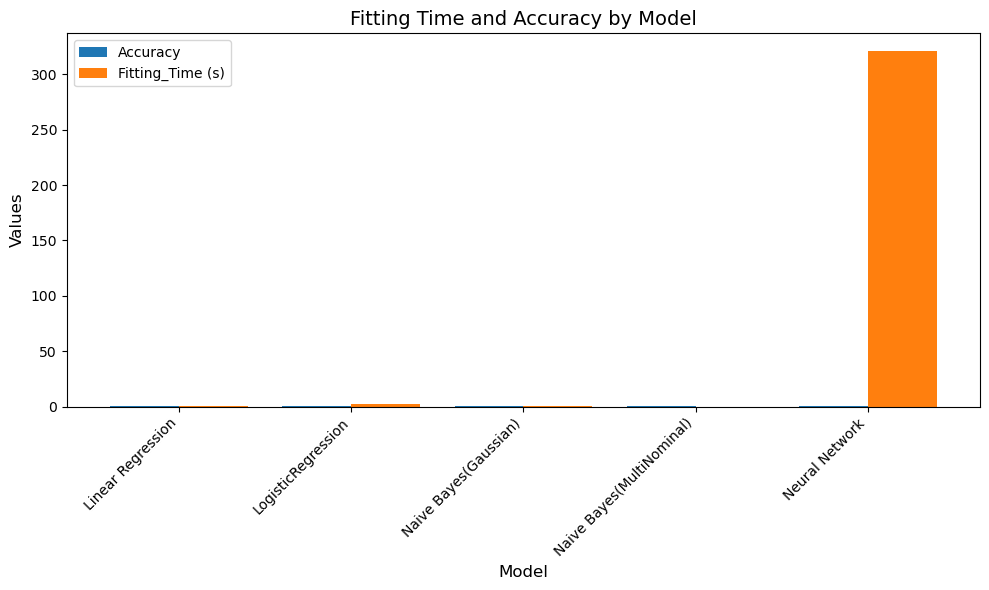

In [95]:
MR_pivot_table.plot(kind="bar", figsize=(10, 6), width=0.8)

# Titles and Labels
plt.title("Fitting Time and Accuracy by Model", fontsize=14)
plt.xlabel("Model", fontsize=12)
plt.ylabel("Values", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.legend(loc="best", fontsize=10)
plt.savefig('Fitting Time and Accuracy by allModel.png', format='png', dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show()

In [99]:
mr_df = MR_df.iloc[1:]
mr_df = pd.DataFrame(mr_df)
mr_pivot_table = mr_df.pivot_table(index="Model", values=["Fitting_Time (s)", "Accuracy"])
display(mr_pivot_table)

,Accuracy,Fitting_Time (s)
Model,,
Linear Regression,0.735500,0.506747
LogisticRegression,0.757000,2.320801
Naive Bayes(Gaussian),0.510621,0.244418


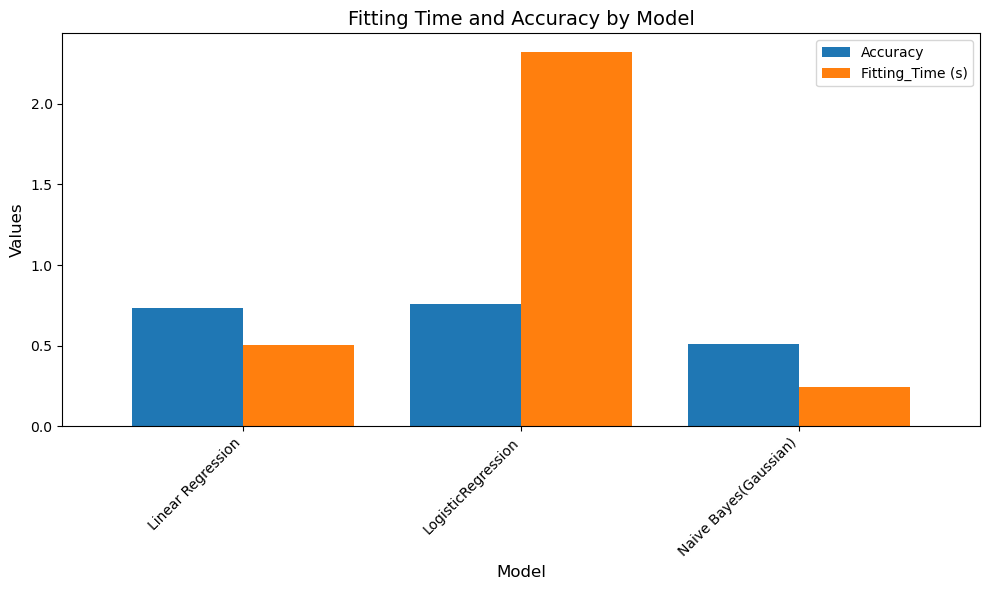

In [101]:
mr_pivot_table.plot(kind="bar", figsize=(10, 6), width=0.8)
# Titles and Labels
plt.title("Fitting Time and Accuracy by Model", fontsize=14)
plt.xlabel("Model", fontsize=12)
plt.ylabel("Values", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.legend(loc="best", fontsize=10)
plt.savefig('Fitting Time and Accuracy by aModel.png', format='png', dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show()

In [103]:
nn_df = MR_df.iloc[0]
nn_df 

Unnamed: 0                       0
Model               Neural Network
Fitting_Time (s)        320.974803
Accuracy                     0.851
Precision                 0.853389
Recall                    0.852286
F1_Score                  0.850021
Name: 0, dtype: object

In [105]:
data = {
    "Model": ["Neural Network"],
    "Fitting_Time (s)": [320.974803],
    "Accuracy": [0.851],
    "Precision": [0.853389],
    "Recall": [0.852286],
    "F1_Score": [0.850021]
}
nn_df = pd.DataFrame(data)
nn_df['Fitting_Time (m)']= nn_df['Fitting_Time (s)']/60
nn_pivot_table = nn_df.pivot_table(index="Model", values=["Fitting_Time (m)", "Accuracy"])
display(nn_pivot_table)

,Accuracy,Fitting_Time (m)
Model,,
Neural Network,0.851,5.34958


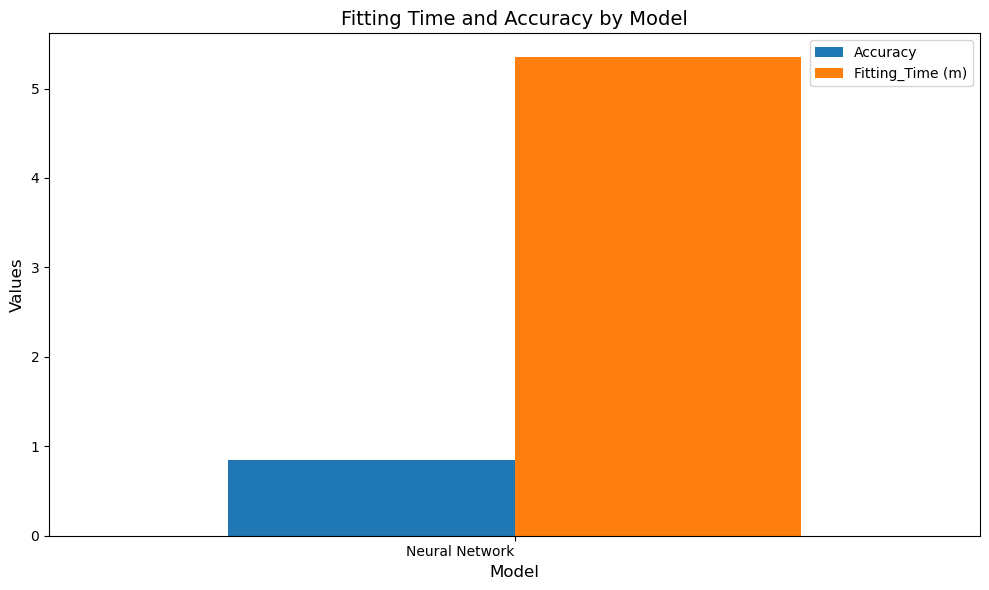

In [107]:
nn_pivot_table.plot(kind="bar", figsize=(10, 6), width=0.8)

# Titles and Labels
plt.title("Fitting Time and Accuracy by Model", fontsize=14)
plt.xlabel("Model", fontsize=12)
plt.ylabel("Values", fontsize=12)
plt.xticks(rotation=0, ha="right")
plt.legend(loc="best", fontsize=10)
plt.savefig('Fitting Time and Accuracy by NN Model2.png', format='png', dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show()

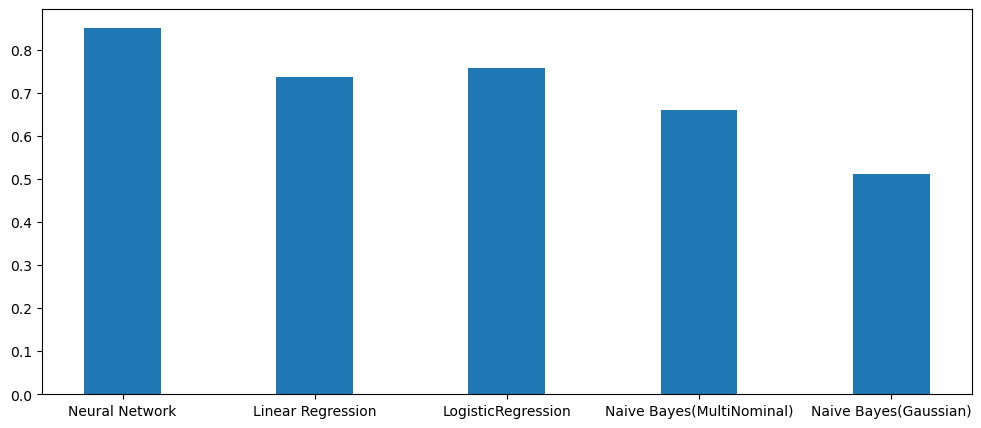

In [75]:
plt.figure(figsize=(12, 5))
plt.bar(x="Model", height="Accuracy", data=MR_df, width=0.4 )
plt.show()

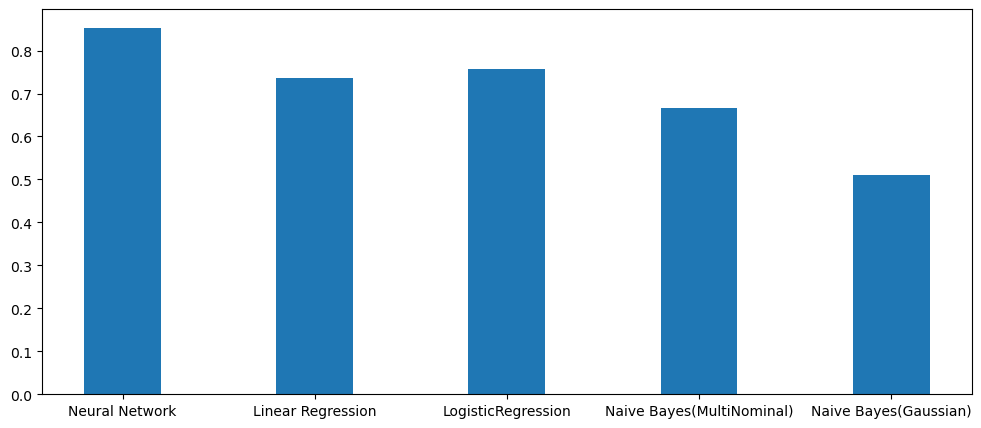

In [121]:
plt.figure(figsize=(12, 5))
plt.bar(x="Model", height="Precision", data=MR_df, width=0.4)
plt.show()

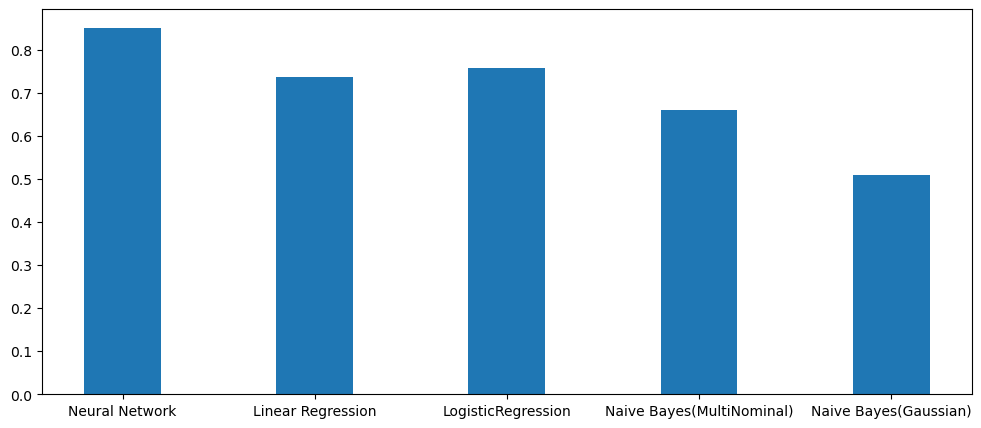

In [123]:
plt.figure(figsize=(12, 5))
plt.bar(x="Model", height="Recall", data=MR_df, width=0.4)
plt.show()

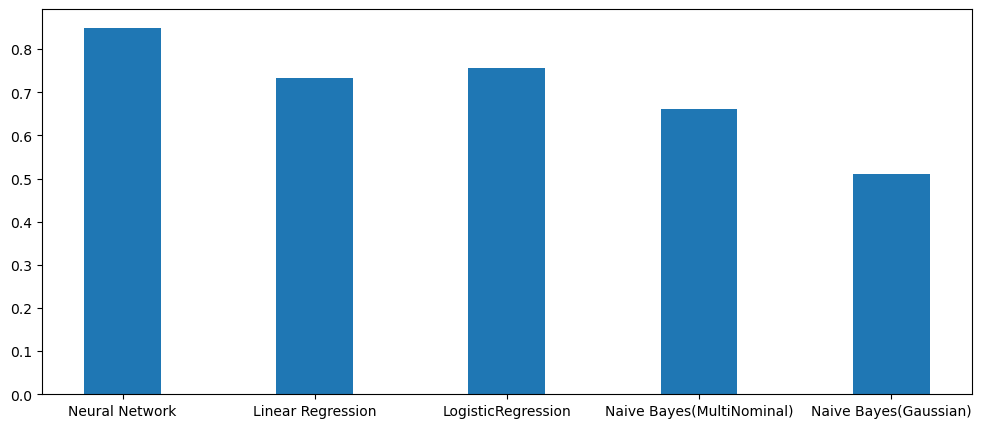

In [125]:
plt.figure(figsize=(12, 5))
plt.bar(x="Model", height="F1_Score", data=MR_df, width=0.4)
plt.show()

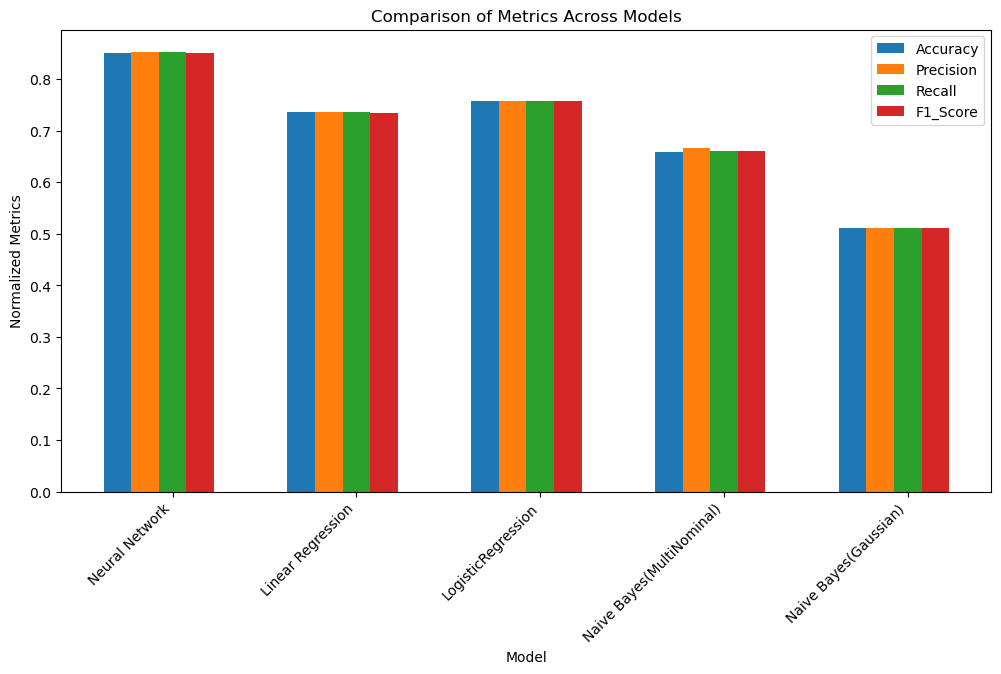

In [83]:
fig, ax = plt.subplots(figsize=(12, 6))

metrics = ["Accuracy", "Precision", "Recall", "F1_Score"]


x = np.arange(len(MR_df["Model"]))
width = 0.15

for i, metric in enumerate(metrics):
    ax.bar(x + i * width, MR_df[metric], width, label=metric)

# Formatting the plot
ax.set_xlabel("Model")
ax.set_ylabel("Normalized Metrics")
# ax2.set_ylabel("Fit_Time (s)")
ax.set_title("Comparison of Metrics Across Models")
ax.set_xticks(x + (len(metrics) / 2) * width)
ax.set_xticklabels(MR_df["Model"], rotation=45, ha="right")

# Combine legends from both axes
lines, labels = ax.get_legend_handles_labels()
# lines2, labels2 = ax2.get_legend_handles_labels()
ax.legend(lines , labels )
plt.savefig('sample_plot.png', format='png', dpi=300, bbox_inches='tight')
plt.show()